# 2장 파이썬 사용 기초

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline


### 데이터 백터 저장하기

In [2]:
score1 = np.array([96, 80, 76, 96, 88, 75, 78])
score2 = np.array([67, 83, 76, 96, 88, 75, 78])

In [3]:
score = np.append(score1, score2)
print(score)

[96 80 76 96 88 75 78 67 83 76 96 88 75 78]


- 데이터 수평결합

In [4]:
sc = np.hstack([score1, score2])
print(sc)

[96 80 76 96 88 75 78 67 83 76 96 88 75 78]


* 숫자의 올림, 내림, 버림, 반올림

In [35]:
import math
z = math.ceil(2.54864) #올림
print(z)
z = math.floor(2.54864) #내림
print(z)
z = math.trunc(2.54864) #버림
print(z)
z = round(2.54864, 2) # 소수점 이하 2 자리 반올림
print(z)

3
2
2
2.55


### 기초 통계량 구하기

In [3]:
import scipy as sp
import numpy as np

In [7]:
score1 = np.array([96, 80, 76, 96, 88, 75, 78])

In [8]:
np.amin(score1) # 최소값

75

In [9]:
np.amax(score1) # 최대값

96

In [10]:
score1/np.std(score1, ddof=1) #표준화

array([10.50727073,  8.75605894,  8.31825599, 10.50727073,  9.63166483,
        8.20880526,  8.53715747])

In [11]:
score1/np.std(score1, ddof=0) #표준화(unbiased var)

array([11.34914951,  9.45762459,  8.98474336, 11.34914951, 10.40338705,
        8.86652305,  9.22118397])

In [2]:
from scipy import stats

In [23]:
from scipy import stats
stats.scoreatpercentile(score1, 25) # 25 percentile

NameError: name 'score1' is not defined

### 행, 열별 함수 적용하기

* 데이터프레임 생성

In [13]:
df = pd.DataFrame({
    'Alphabet' : ['a','b','c','d','e','f','g','h','i','j'],
    'num' : [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
    'length' : np.arange(10)
})
df # python의 dict와 비슷

,Alphabet,num,length
0,a,3,0
1,b,3,1
2,c,3,2
3,d,3,3
4,e,3,4
5,f,3,5
6,g,3,6
7,h,3,7
8,i,3,8
9,j,3,9


In [14]:
df.mean() #열 별 평균, 계산할 수 없는 열은 자동으로 넘어감

num       3.0
length    4.5
dtype: float64

In [15]:
df.mean(axis=0) # column 별 평균

num       3.0
length    4.5
dtype: float64

In [16]:
df.mean(axis=1) # row 별 평균

0    1.5
1    2.0
2    2.5
3    3.0
4    3.5
5    4.0
6    4.5
7    5.0
8    5.5
9    6.0
dtype: float64

* 순서함수

In [17]:
a = [3,2,1,4,5]

In [18]:
sorted(a)

[1, 2, 3, 4, 5]

In [19]:
np.sort(a) #array로 반환

array([1, 2, 3, 4, 5])

In [20]:
sorted(a, reverse=True)

[5, 4, 3, 2, 1]

In [21]:
a.sort() # 정렬된 값이 a에 적용됨
a

[1, 2, 3, 4, 5]

* 순서함수의 활용

In [22]:
df = pd.DataFrame({
    'name' : ['KIM', 'LEE', 'PARK', 'BAE'],
    'age' : [24, 32, 24, np.nan],
    'height' : [160, 170, 180, 155]
})
df

,name,age,height
0,KIM,24.0,160
1,LEE,32.0,170
2,PARK,24.0,180
3,BAE,NaN,155


In [23]:
df['age_rank'] = df['age'].rank(method = 'min', ascending=False, na_option='bottom')
df

,name,age,height,age_rank
0,KIM,24.0,160,2.0
1,LEE,32.0,170,1.0
2,PARK,24.0,180,2.0
3,BAE,NaN,155,4.0


In [24]:
# ascending=False  :  내림차순 정렬
# method = 'min'   :   동점일 경우 최솟값 할당
# na_option='bottom'   : 결측값은 후순위 할당

* 결측치를 선순위를 주고자 할 경우

In [25]:
df['age_rank'] = df['age'].rank(method = 'min', ascending=False, na_option='top')
df

,name,age,height,age_rank
0,KIM,24.0,160,3.0
1,LEE,32.0,170,2.0
2,PARK,24.0,180,3.0
3,BAE,NaN,155,1.0


* DataFrame 안에서 'name'을 기준으로 순서함수 적용하기

In [26]:
df_sort_name = df.sort_values(by='name')  # 오름차순 배열
df_sort_name

,name,age,height,age_rank
3,BAE,NaN,155,1.0
0,KIM,24.0,160,3.0
1,LEE,32.0,170,2.0
2,PARK,24.0,180,3.0


In [27]:
df_sort_name = df.sort_values(by='name', ascending=False)  # 내림차순 배열
df_sort_name

,name,age,height,age_rank
2,PARK,24.0,180,3.0
1,LEE,32.0,170,2.0
0,KIM,24.0,160,3.0
3,BAE,NaN,155,1.0


### 구조적 데이터 만들기

* arange, tile, zeors, ones함수

In [30]:
np.arange(1,7,2)  #1부터 7-1까지 2칸씩 띄우면서 출력

array([1, 3, 5])

In [31]:
np.tile(0,5)

array([0, 0, 0, 0, 0])

In [32]:
np.tile('a',3)

array(['a', 'a', 'a'], dtype='<U1')

In [33]:
np.zeros([2,3])

array([[0., 0., 0.],
       [0., 0., 0.]])

In [34]:
np.zeros(6)

array([0., 0., 0., 0., 0., 0.])

In [35]:
np.ones(4)

array([1., 1., 1., 1.])

In [36]:
np.ones([2,5])

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

### 데이터 백터 다루기

*인덱스(index)

In [37]:
x = np.array([1,2,3,4,5,6,7,8,9,10])

In [38]:
x[1]

2

In [39]:
x[1:3]

array([2, 3])

In [40]:
x[1:9:2]

array([2, 4, 6, 8])

In [41]:
x[-1]

10

In [42]:
x[6:]

array([ 7,  8,  9, 10])

In [43]:
x[:4]

array([1, 2, 3, 4])

In [45]:
sample_array = np.array([1,2,3,4,5])

In [46]:
df = pd.DataFrame({
    'col1' : sample_array,
    'col2' : sample_array *2,
    'col3' : ['A', 'B', 'C', 'D', 'E']
})
df

,col1,col2,col3
0,1,2,A
1,2,4,B
2,3,6,C
3,4,8,D
4,5,10,E


### 백터와 행렬 표현과 연산

In [47]:
A = np.array(
    [[1,2,3,4,5], [6,7,8,9,10], [11,12,13,14,15]])
A

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

열 벡터 a = a1  \
　　　　　a2  \
　　　　　a3

행 벡터 a' = (a1, a2, a3)

### 전치행렬

In [50]:
B =np.array(
    [[1,2], [3,4], [5,6]])
B

array([[1, 2],
       [3, 4],
       [5, 6]])

* B의 전치행렬

In [52]:
B.T

array([[1, 3, 5],
       [2, 4, 6]])

### 행렬의 계산

In [53]:
x = np.array([1,2,3,4,5])
y = np.array([-1,-2,-3,-4,-5])
x+y

array([0, 0, 0, 0, 0])

x'y

In [56]:
np.matmul(x.transpose(), y)

-55

In [57]:
np.matmul(x.T, y)

-55

In [58]:
x.T@y

-55

In [59]:
x@x.T

55

* 외적 outer

In [60]:
np.outer(x, x.T)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

그냥 x를 쓰게 되면

In [62]:
x*x  #각 성분의 곱으로 계산

array([ 1,  4,  9, 16, 25])

#### x, y를 하나의 열벡터로 만들기

In [63]:
np.r_[x,y]

array([ 1,  2,  3,  4,  5, -1, -2, -3, -4, -5])

In [64]:
np.hstack([x,y])

array([ 1,  2,  3,  4,  5, -1, -2, -3, -4, -5])

In [65]:
np.concatenate((x,y),axis=0)

array([ 1,  2,  3,  4,  5, -1, -2, -3, -4, -5])

#### x,y를 두 개의 열벡터를 가진 행렬로 만들기

In [68]:
np.c_[x,y]

array([[ 1, -1],
       [ 2, -2],
       [ 3, -3],
       [ 4, -4],
       [ 5, -5]])

In [67]:
np.column_stack([x,y])

array([[ 1, -1],
       [ 2, -2],
       [ 3, -3],
       [ 4, -4],
       [ 5, -5]])

#### x,y를 두 개의 행벡터를 가진 행렬로 만들기

In [71]:
np.r_[[x],[y]]

array([[ 1,  2,  3,  4,  5],
       [-1, -2, -3, -4, -5]])

In [72]:
np.vstack([x,y])

array([[ 1,  2,  3,  4,  5],
       [-1, -2, -3, -4, -5]])

* 내적 dot

In [73]:
np.dot(x,y)

-55

#### 차원 알아보기

In [75]:
x.shape

(5,)

In [76]:
B = np.r_[[x],[y]]
B.shape

(2, 5)

### 대각행렬
#### 대각선에만 특정 값이 있는 행렬

In [83]:
np.diag([1 for _ in range(5)])  # I, 단위 행렬이라고 부름

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

In [82]:
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

* 역행렬 = 자신과 곱했을 때, 단위행렬이 나오게 하는 행렬

AA^-1 = I

In [90]:
#a의 역행렬
a = np.array([[1,2,3],[1,3,3],[1,2,4]])
a_inv = np.linalg.inv(a)
a_inv

array([[ 6., -2., -3.],
       [-1.,  1.,  0.],
       [-1.,  0.,  1.]])

In [91]:
a@a_inv

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

* 2X3 2차원 배열 만들기

In [92]:
np.zeros([2,3])

array([[0., 0., 0.],
       [0., 0., 0.]])

In [93]:
np.empty((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

* 값이 모두 3인 2X4배열 만들기

In [94]:
np.full((2,4),3)

array([[3, 3, 3, 3],
       [3, 3, 3, 3]])

* 3차원 4X3X2 배열에 0부터 23까지 값 할당하기

In [97]:
b = np.arange(24).reshape(4,3,2) # arange로 0~23 list를 만든 뒤, reshape로 배열생성
b

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

* 3차원 배열에서의 성분 선택

In [98]:
b[0,:,:]

array([[0, 1],
       [2, 3],
       [4, 5]])

In [99]:
b[1,1,:]

array([8, 9])

In [101]:
b[3,1,1]

21

* 3X3행렬에서 대각선에는 1, 아닌 곳에는 0을 갖는 단위행렬 만들기

In [107]:
np.diag([1 for _ in range(3)])

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [108]:
np.eye(3,3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### 결측값

In [121]:
b = np.arange(12).reshape(4,3)
df = pd.DataFrame(b, columns=['X1','X2','X3'])
df

,X1,X2,X3
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


* 결측값 만들기

In [122]:
df.loc[1,['X1','X3']] = np.nan
df

,X1,X2,X3
0,0.0,1,2.0
1,NaN,4,NaN
2,6.0,7,8.0
3,9.0,10,11.0


* 결측값 대체하기

In [124]:
df_0 = df.fillna(0)
df_0

,X1,X2,X3
0,0.0,1,2.0
1,0.0,4,0.0
2,6.0,7,8.0
3,9.0,10,11.0


In [126]:
df_missing = df.fillna('missing')
df_missing

,X1,X2,X3
0,0.0,1,2.0
1,missing,4,missing
2,6.0,7,8.0
3,9.0,10,11.0


* 결측값을 앞 열의 값으로 대체하기

In [128]:
df.fillna(method='ffill')

,X1,X2,X3
0,0.0,1,2.0
1,0.0,4,2.0
2,6.0,7,8.0
3,9.0,10,11.0


* 결측값을 뒤 열의 값으로 대체하기

In [129]:
df.fillna(method='bfill')

,X1,X2,X3
0,0.0,1,2.0
1,6.0,4,8.0
2,6.0,7,8.0
3,9.0,10,11.0


* 결측값을 변수별 평균으로 대체

In [130]:
df.fillna(df.mean())

,X1,X2,X3
0,0.0,1,2.0
1,5.0,4,7.0
2,6.0,7,8.0
3,9.0,10,11.0


### 데이터프레임에서 특정 열 추출

In [133]:
df

,X1,X2,X3
0,0.0,1,2.0
1,NaN,4,NaN
2,6.0,7,8.0
3,9.0,10,11.0


In [132]:
df.X1

0    0.0
1    NaN
2    6.0
3    9.0
Name: X1, dtype: float64

In [134]:
df['X1']

0    0.0
1    NaN
2    6.0
3    9.0
Name: X1, dtype: float64

In [135]:
df[['X1','X2']]

,X1,X2
0,0.0,1
1,NaN,4
2,6.0,7
3,9.0,10


In [137]:
df.drop('X2', axis=1)

,X1,X3
0,0.0,2.0
1,NaN,NaN
2,6.0,8.0
3,9.0,11.0


In [138]:
df.query('index==0')

,X1,X2,X3
0,0.0,1,2.0


In [139]:
df.query('X1==0')

,X1,X2,X3
0,0.0,1,2.0


In [141]:
df.query('X1==0 | X3==8') # X1열의 값이 0 또는 X3열의 값이 8인 경우만 출력

,X1,X2,X3
0,0.0,1,2.0
2,6.0,7,8.0


In [143]:
df.query('X1==0 | X1==9')[['X2','X3']]

,X2,X3
0,1,2.0
3,10,11.0


### 데이터 파일 읽기, 파일로 저장하기

* 파일읽기 txt나 csv파일

In [147]:
test = pd.read_csv('data/toeic.csv')
test.head(1)

,Gender,LC,RC
0,female,315,320


In [148]:
df

,X1,X2,X3
0,0.0,1,2.0
1,NaN,4,NaN
2,6.0,7,8.0
3,9.0,10,11.0


In [149]:
df.to_csv('c://데이터파일//dfex1.csv', header=True, index=True)

In [152]:
AA = pd.read_csv('c://데이터파일//dfex1.csv') #txt로 저장하려면 .txt로

In [153]:
AA

,Unnamed: 0,X1,X2,X3
0,0,0.0,1,2.0
1,1,NaN,4,NaN
2,2,6.0,7,8.0
3,3,9.0,10,11.0


### 데이터셋 합치기

In [160]:
author = pd.DataFrame({
    'surname' : ['Tukey', 'Venables', 'Tim', 'Rey'],
    'nationality' : ['US', 'Australia', 'US', 'UK']
})
author

,surname,nationality
0,Tukey,US
1,Venables,Australia
2,Tim,US
3,Rey,UK


In [161]:
books = pd.DataFrame({
    'name' : ['Tukey', 'Venables', 'Tim', 'Rey'],
    'year' : [1976, 2000, 2010, 2021]
})
books

,name,year
0,Tukey,1976
1,Venables,2000
2,Tim,2010
3,Rey,2021


In [162]:
#author의 surname과 books의 name이 동일한 경우 병합
mer = pd.merge(author, books, left_on=['surname'], right_on=['name'])
mer

,surname,nationality,name,year
0,Tukey,US,Tukey,1976
1,Venables,Australia,Venables,2000
2,Tim,US,Tim,2010
3,Rey,UK,Rey,2021


In [163]:
mer.drop(['surname'], axis=1, inplace=True) #inplace=True : mer에 바로 반영하겠다
mer

,nationality,name,year
0,US,Tukey,1976
1,Australia,Venables,2000
2,US,Tim,2010
3,UK,Rey,2021


In [165]:
author1 = pd.DataFrame({
    'surname' : ['Tukey', 'Venables', 'Tim', 'Rey'],
    'nationality' : ['US', 'Australia', 'US', 'UK']
})
author1

,surname,nationality
0,Tukey,US
1,Venables,Australia
2,Tim,US
3,Rey,UK


In [166]:
books1 = pd.DataFrame({
    'name' : ['Tukey', 'Venables', 'Tim', 'Rey', 'KIM'],
    'year' : [1976, 2000, 2010, 2021, 2022]
})
books1

,name,year
0,Tukey,1976
1,Venables,2000
2,Tim,2010
3,Rey,2021
4,KIM,2022


In [169]:
mer1 = pd.merge(author1, books1, left_on=['surname'], right_on=['name'])
mer1

,surname,nationality,name,year
0,Tukey,US,Tukey,1976
1,Venables,Australia,Venables,2000
2,Tim,US,Tim,2010
3,Rey,UK,Rey,2021


In [170]:
mer2 = pd.merge(author1, books1, left_on=['surname'], right_on=['name'], how='outer')
mer2

,surname,nationality,name,year
0,Tukey,US,Tukey,1976
1,Venables,Australia,Venables,2000
2,Tim,US,Tim,2010
3,Rey,UK,Rey,2021
4,NaN,NaN,KIM,2022


# 연습문제

* 2번) 2 3 5 7 9 10  \
1) 벡터x를 만드시오.  \
2) 각 데이터의 제곱으로 구성된 벡터 x2를 만드시오.  \
3) 각 데이터의 제곱의 합을 구하시오.  \
4) 최댓값, 최소값을 구하시오.  \
5) 5보다 큰 값들만으로 구성된 x_up을 만드시오.  \
6) xx'를 구하시오.  \
7) x'x를 구하시오.  \
8) x와 x2를 열결합하여 xc에 할당하시오.  \
9) x와 x2를 행결합하여 xr에 할당하시오.

In [175]:
# 1)
x = np.array([2,3,5,7,9,10])
print(x)
# 2)
x2 = x**2
print(x2)
# 3)
print(x2.sum())
# 4)
print(x.max())
print(x.min())
# 5)
x_up = x[x>5]
print(x_up)
# 6)
print(np.outer(x, x.T))
# 7)
print(x.T@x)
# 8)
xc = np.c_[x, x2]
print(xc)
# 9)
xr = np.r_[[x], [x2]]
print(xr)

[ 2  3  5  7  9 10]
[  4   9  25  49  81 100]
268
10
2
[ 7  9 10]
[[  4   6  10  14  18  20]
 [  6   9  15  21  27  30]
 [ 10  15  25  35  45  50]
 [ 14  21  35  49  63  70]
 [ 18  27  45  63  81  90]
 [ 20  30  50  70  90 100]]
268
[[  2   4]
 [  3   9]
 [  5  25]
 [  7  49]
 [  9  81]
 [ 10 100]]
[[  2   3   5   7   9  10]
 [  4   9  25  49  81 100]]


* 4번 다음 값이 나오도록 함수를 사용하여 명령문을 만들고 결과를 보이시오. \
1) 'a','a','a','a','a','a','a','a'  \
2) 1,1,1,2,2,2,3,3,3,4,4,4,5,5,5  \
3) 1부터 100 사이의 홀수  \
4) 1,5,19,30을 갖는 array  \
5) -10부터 10까지의 정수

In [187]:
#1
a = np.full(8, 'a')
print(a)

#2
b = np.arange(1, 6)
c = sorted(np.r_[b, b, b])
print(c)

#3
print(np.arange(1,101,2))

#4
print(np.array([1,5,19,30]))

#5
print(np.arange(-10, 11))

['a' 'a' 'a' 'a' 'a' 'a' 'a' 'a']
[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5]
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87 89 91 93 95
 97 99]
[ 1  5 19 30]
[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]


* 5번 1~10까지 갖는 벡터 x \
sigma(xi/i), i=1 ~ 10 구하시오.

In [190]:
x = np.arange(1, 11)
sig = 0
for i in range(0, 10):
    sig += x[i]/(i+1)
print(sig)

10.0


* 7번  \
-4.123 -3.556 1.634 2.213 3.875  \
1)벡터 x에 할당 후 출력  \
2)x가 소수점 둘째 자리까지만 갖도록 y에 저장 후 출력  \
3)x와 y의 차를 구하시오  \
4)x의 소수 첫째 자리까지 반올림한 값이 나오도록 하시오.  \
5)x의 올림한 값을 구하시오  \
6)x의 내림한 값을 구하시오

In [195]:
#1
x = np.array([4.123, -3.556, 1.634, 2.213, 3.875])
print(x)

#2
import math
y = np.around(x, 2)

#3
print(x-y)

#4
print(np.around(x, 1))

#5
print(np.ceil(x))

#6
print(np.floor(x))

[ 4.123 -3.556  1.634  2.213  3.875]
[ 0.003  0.004  0.004  0.003 -0.005]
[ 4.1 -3.6  1.6  2.2  3.9]
[ 5. -3.  2.  3.  4.]
[ 4. -4.  1.  2.  3.]


* 9번

In [191]:
korean1 = pd.DataFrame({
    '국어' : [93,84,87,95,98,77,82,92],
    '1반' : ['kim', 'lee', 'park','oh','yang','min','jung','moon']})
korean2 = pd.DataFrame({
    '국어' : [90,95,88,75,79,87,90,90],
    '2반' :['kim', 'lee', 'park','oh','yang','min','jung','moon']})
a = pd.concat([korean1,korean2], axis=0)
B = pd.melt(a, id_vars='국어', var_name='반', value_name='성')
B.dropna(inplace=True)
B = B.reset_index(drop=True)
B

,국어,반,성
0,93,1반,kim
1,84,1반,lee
2,87,1반,park
3,95,1반,oh
4,98,1반,yang
5,77,1반,min
6,82,1반,jung
7,92,1반,moon
8,90,2반,kim
9,95,2반,lee


# 3장 그래프

In [6]:
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline

#matplotlib은 그래프를 그리는 표준라이브러리
#seaborn은 그래프를 더 예쁘게 그릴 수 있게 하는 라이브러리

* 기본 그래프 그리기

Text(0, 0.5, 'Y')

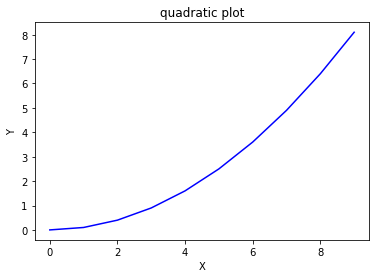

In [197]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = (x**2)/10

plt.plot(x, y, 'b')
plt.title('quadratic plot')
plt.xlabel('X')
plt.ylabel('Y')

* seaborn으로 그래프 디자인하기

Text(0, 0.5, 'Y')

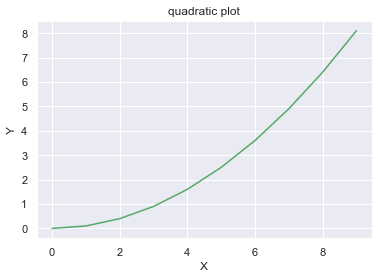

In [198]:
sns.set()
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = (x**2)/10

plt.plot(x, y, 'g')
plt.title('quadratic plot')
plt.xlabel('X') ; plt.ylabel('Y')

* 표준정규분포를 따르는 랜덤 데이터 100개를 히스토그램으로 그리기

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

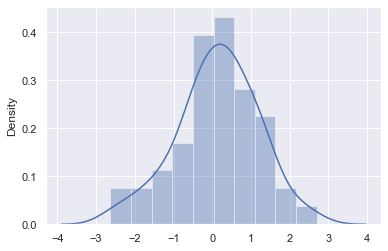

In [200]:
x = np.random.normal(size = 100)
sns.distplot(x)

(array([ 4.,  4.,  6.,  9., 21., 23., 15., 12.,  4.,  2.]),
 array([-2.633, -2.1  , -1.567, -1.033, -0.5  ,  0.033,  0.566,  1.1  ,
         1.633,  2.166,  2.699]),
 <BarContainer object of 10 artists>)

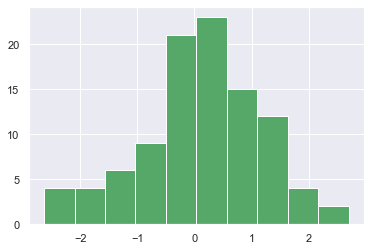

In [203]:
plt.hist(x, bins=10, color='g')

(array([0.075, 0.075, 0.113, 0.169, 0.394, 0.431, 0.281, 0.225, 0.075,
        0.038]),
 array([-2.633, -2.1  , -1.567, -1.033, -0.5  ,  0.033,  0.566,  1.1  ,
         1.633,  2.166,  2.699]),
 <BarContainer object of 10 artists>)

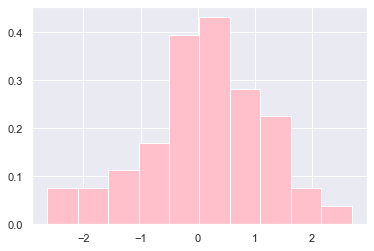

In [208]:
plt.hist(x, density=True, color='pink') #density = True : y축의 값을 density로 변경

* 표준정규분포를 따르는 랜덤 데이터 100개를 상자그림으로 그리기

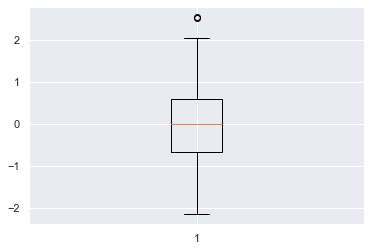

In [213]:
x = np.random.normal(size=100)
plt.boxplot(x)
plt.show()

In [214]:
fish=pd.read_csv('data/3-3-2-fish_multi_2.csv')
fish

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4
5,A,4
6,A,4
7,A,5
8,A,5
9,A,6


In [216]:
fish.groupby('species').describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

<AxesSubplot:xlabel='species', ylabel='length'>

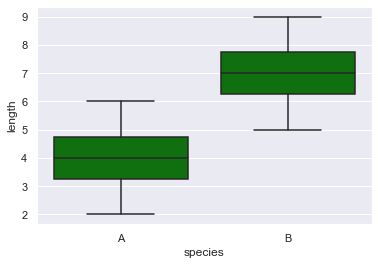

In [220]:
sns.boxplot(x='species', y='length', data=fish, color='green')

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'denisity')

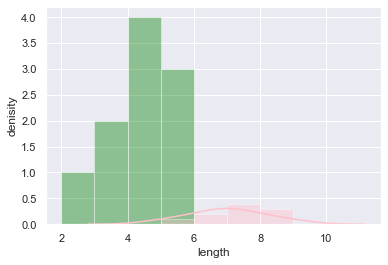

In [224]:
a = fish.query("species=='A'")['length']
b = fish.query("species=='B'")['length']
sns.distplot(a, bins=4, color='green',kde=False)
sns.distplot(b, bins=4, color='pink',kde=True) # kde를 True로 줬기 때문에 density로 변경됨
plt.ylabel('denisity')

* (x,y) 산점도

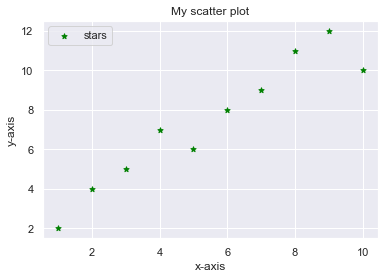

In [226]:
x = list(range(1,11))
y = [2,4,5,7,6,8,9,11,12,10]

plt.scatter(x, y, label='stars', color='green', marker ='*', s=30)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('My scatter plot')
plt.legend()
plt.show()

* 두 선을 같은 좌표평면에 그리기

No handles with labels found to put in legend.


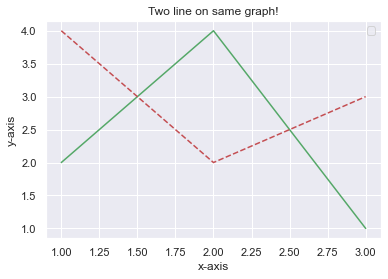

In [245]:
x1 = [1,2,3]
y1 = [2,4,1]
plt.plot(x1,y1,label='line 1')

x2=[1,2,3]
y2=[4,2,3]
plt.plot(x2,y2,label='line 2')

# plt.plot(x1,y1,'g-', x2,y2,'r--')

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Two line on same graph!')
plt.legend()
plt.show()

* 하나는 점으로 하나는 선으로 그리기

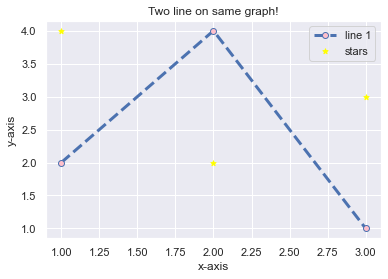

In [230]:
plt.plot(x1,y1,label='line 1', linestyle='dashed', linewidth=3, marker='o',markerfacecolor='pink',markersize=6)
plt.scatter(x2,y2,label='stars',color='yellow', marker='*', s=30)


plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Two line on same graph!')
plt.legend()
plt.show()

* 파이 그래프 그리기

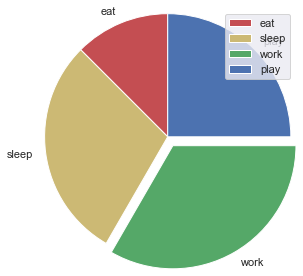

In [240]:
activities = ['eat', 'sleep', 'work', 'play']
slices = [3,7,8,6]
colors = ['r','y','g','b']

plt.pie(slices, labels=activities, colors=colors, startangle=90, explode=(0,0,0.1,0), radius=1.2) #explode는 띄우기, radius=원지름
plt.legend()
plt.tight_layout()
plt.show()

* dufj rmfovmfmf gks ghkausdp qoduf

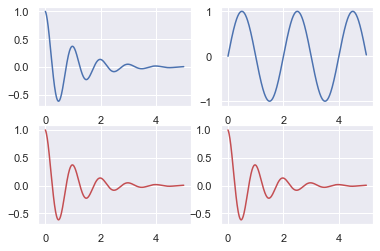

In [246]:
def f(t):
    return np.exp(-t)*np.cos(2*np.pi*t)
def g(t):
    return np.sin(np.pi*t)

t1 = np.arange(0.0, 5.0, 0.01)
t2 = np.arange(0.0, 5.0, 0.01)

plt.subplot(221)
plt.plot(t1, f(t1))
plt.subplot(222)
plt.plot(t2, g(t2))
plt.subplot(223)
plt.plot(t1, f(t1), 'r-')
plt.subplot(224)
plt.plot(t2, f(t2), 'r-')


|name|color|marker|meaning
|:--|:--|:--|:--|
|b|blue|o|circle
|g|green|^|triangle
|r|red|s|square
|c|cyan(청록)|+|plus
|m|magenta(자홍)|.|point
|y|yellow|star|
|k|black|
|w|white|

### plt.xlim() : x축의 상, 하한선 주기, ex) plt.xlim = c(1,10)
### plt.ylim() : y축의 상, 하한선 주기

### 점 크기가 위치에 따라 달라지는 그래프 그리기

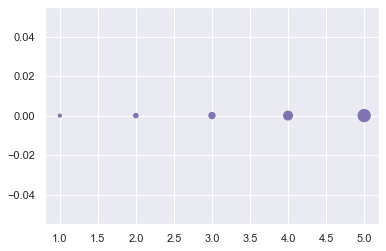

In [261]:
x = [1,2,3,4,5]
y = [0,0,0,0,0]
s = [10,20,40,80,150]
plt.scatter(x,y,s,color='m')

In [263]:
primates = pd.DataFrame({
    'animal' : ['monkey', 'gorilla', 'human', 'Rhesus monkey', 'chimp'],
    'bodywt' : [10, 207, 62, 6.8, 52.2],
    'brainwt' : [115, 406, 1320, 179, 440]
})
primates

,animal,bodywt,brainwt
0,monkey,10.0,115
1,gorilla,207.0,406
2,human,62.0,1320
3,Rhesus monkey,6.8,179
4,chimp,52.2,440


## 그래프에 다양한 옵션 적용하기

Text(10, 160, 'Rhesus monkey')

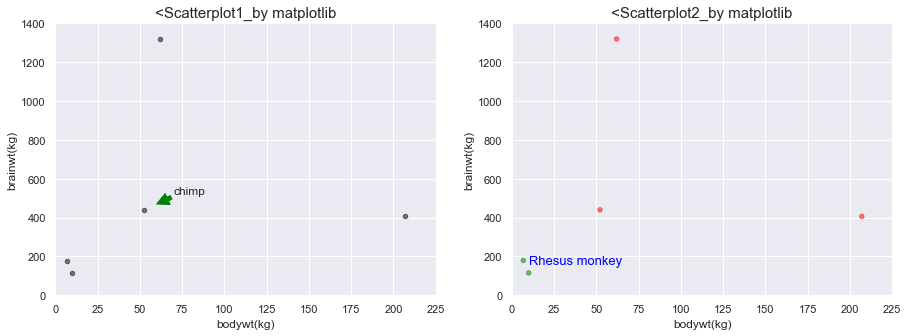

In [281]:
plt.figure(figsize = (15,5))
plt.subplot(121)
plt.scatter('bodywt', 'brainwt', data=primates, marker='o', s=20, color='black',alpha=0.5)
plt.title('<Scatterplot1_by matplotlib', fontsize=15)
plt.xlabel('bodywt(kg)', fontsize=12)
plt.ylabel('brainwt(kg)', fontsize=12)
plt.xlim(0,225), plt.ylim(0,1400)
plt.annotate('chimp', xy=(60,470), xytext=(70,520),arrowprops={'color':'green'})



plt.subplot(122)
cutpoint=(primates['bodywt']>50) & (primates['brainwt']>300)
primates['color'] = np.where(cutpoint==True, 'red', 'green')

plt.scatter('bodywt', 'brainwt', data=primates, marker='o', color=primates['color'], s=20, alpha=0.5)
plt.title('<Scatterplot2_by matplotlib', fontsize=15)
plt.xlabel('bodywt(kg)', fontsize=12)
plt.ylabel('brainwt(kg)', fontsize=12)
plt.xlim(0,225), plt.ylim(0,1400)
plt.text(10,160,'Rhesus monkey', fontsize=13, color='blue')

## 분포 그래프 pairplot 그리기

In [283]:
iris = sns.load_dataset('iris')
print(iris.groupby('species').mean())

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026


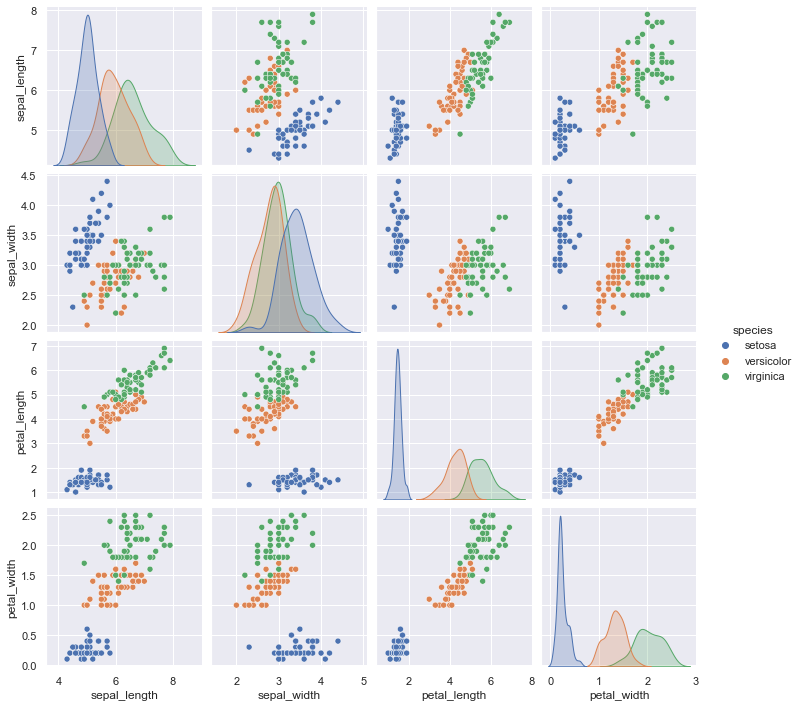

In [284]:
sns.pairplot(iris, hue='species')

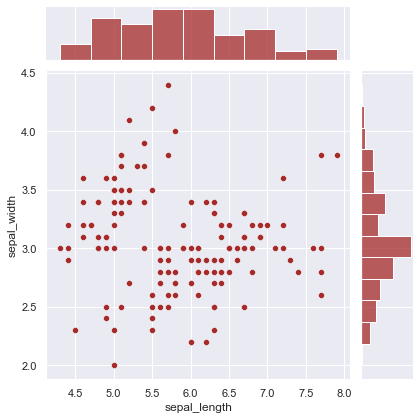

In [285]:
sns.jointplot(x='sepal_length', y='sepal_width', data=iris, color='brown')

In [290]:
A = iris.groupby('species').mean()
A

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


<AxesSubplot:xlabel='species'>

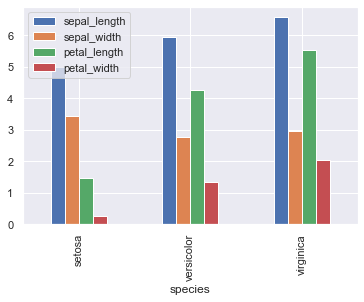

In [292]:
A.plot.bar()

* 붓꽃 데이터셋의 변수별 분포 그리기

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [8]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [23]:
#연속형 변수 추출
iris_numeric = iris.drop('species', axis=1)
print(iris_numeric)
for i in iris_numeric:
    print(i)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
sepal_length
sepal_width
petal_length
petal_width


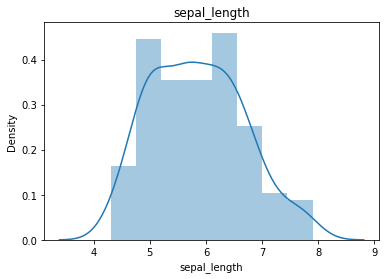

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


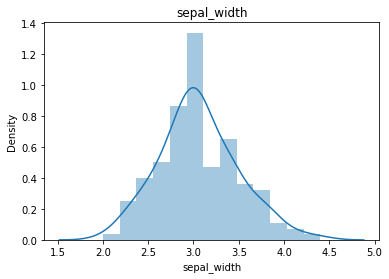

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


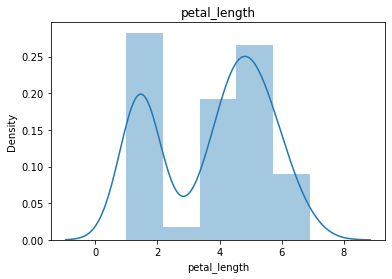

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


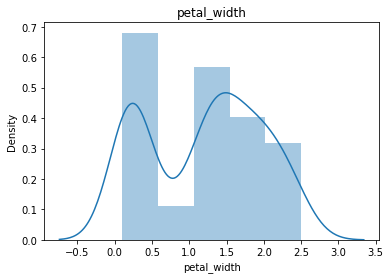

In [26]:
for i in iris_numeric:
    sns.distplot(iris.loc[iris[i].notnull(), i])
    plt.title(i)
    plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

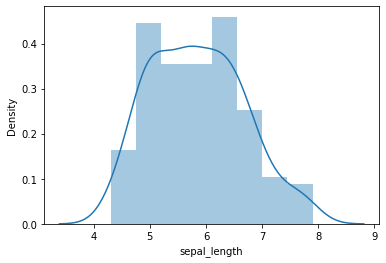

In [42]:
sns.distplot(iris.loc[iris['sepal_length'].notnull(), 'sepal_length'])

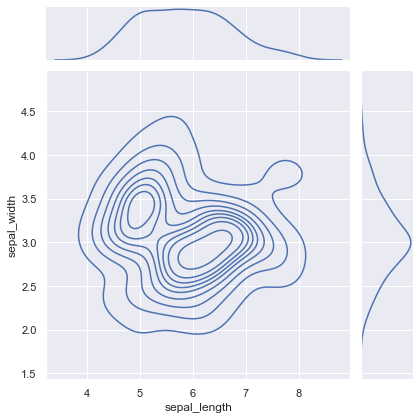

In [49]:
sns.set()
sns.jointplot(x='sepal_length', y = 'sepal_width', data=iris, kind='kde')
plt.show()

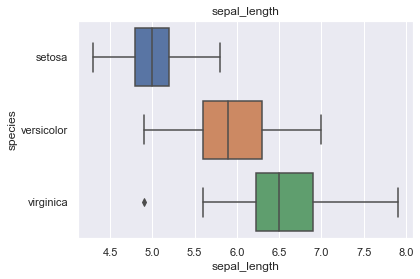

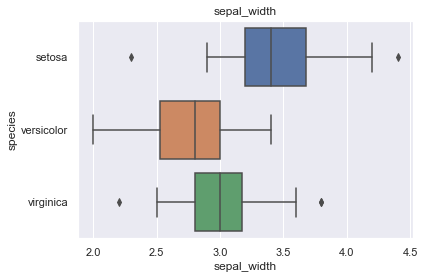

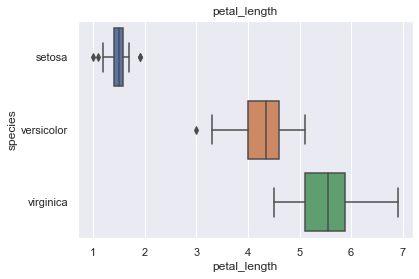

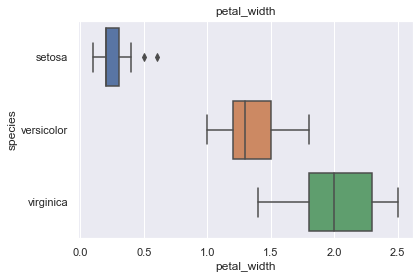

In [50]:
for i in iris_numeric:
    sns.boxplot(x = iris.loc[iris[i].notnull(), i], y = 'species', data = iris)
    plt.title(i)
    plt.show()

### 각 변수에 관한 분포 그래프 그리기(여러 그래프, PairGrid)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

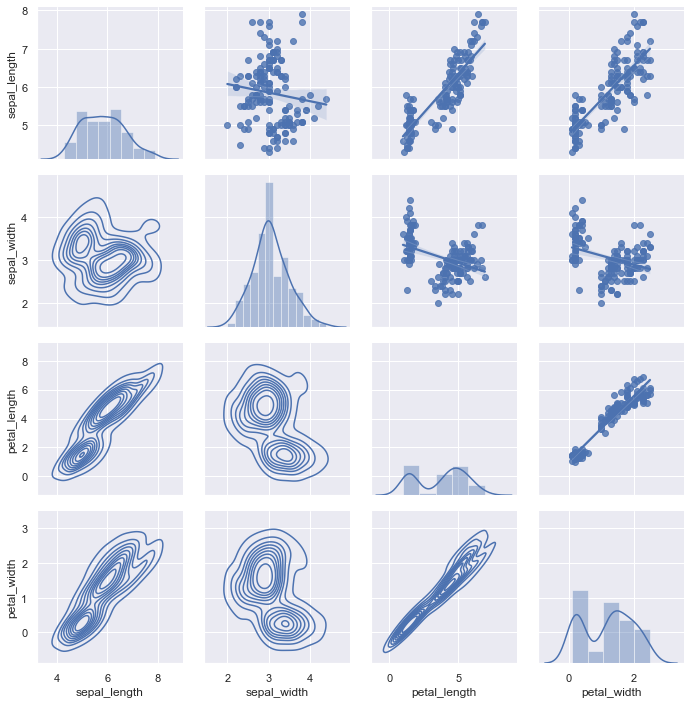

In [53]:
pg = sns.PairGrid(iris)   # pairgrid 형태 만들기
pg.map_upper(sns.regplot) # 위쪽은 산점도를 위치
pg.map_lower(sns.kdeplot) # 아래쪽은 커널밀도함수 위치
pg.map_diag(sns.distplot)  # 가운데는 히스토그램 위치

### 모자이크 그림

In [56]:
from statsmodels.graphics.mosaicplot import mosaic

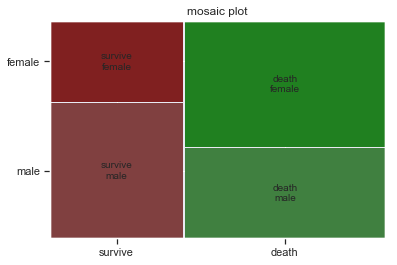

In [59]:
airplan ={('survive', 'male') : 50, ('survive', 'female') : 30,
         ('death', 'male') : 50, ('death', 'female') : 70}
mosaic(airplan, title='mosaic plot')
plt.show()

### 표준정규분포의 확률밀도함수 그리기

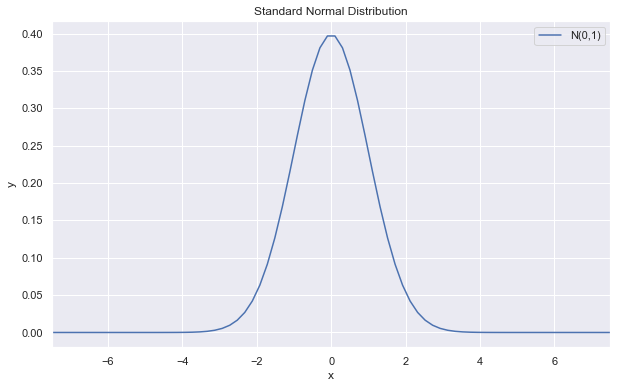

In [62]:
x = np.linspace(-10,10,100) #-10에서 10 사이를 100칸으로 나누기
y = (1/np.sqrt(2*np.pi))*np.exp(-x**2/2)
plt.figure(figsize=(10,6))
plt.plot(x,y) ; plt.xlabel('x');plt.ylabel('y')
plt.legend(['N(0,1)'])
# plt.grid()
plt.title('Standard Normal Distribution')
plt.xlim(-7.5,7.5)
plt.show()

### 3장 연습문제

* y=x^2, x|-1,1| 그래프를 그리시오  \
* 1) [-1, 1] 사이에 등간격 100개 값을 생성하여 x 에 할당  \
* 2) 점으로 표시되도록 그리기  \
* 3) 좌표평면에 빨간색 선으로 출력되도록 그리기  \

[-1.         -0.97979798 -0.95959596 -0.93939394 -0.91919192 -0.8989899
 -0.87878788 -0.85858586 -0.83838384 -0.81818182 -0.7979798  -0.77777778
 -0.75757576 -0.73737374 -0.71717172 -0.6969697  -0.67676768 -0.65656566
 -0.63636364 -0.61616162 -0.5959596  -0.57575758 -0.55555556 -0.53535354
 -0.51515152 -0.49494949 -0.47474747 -0.45454545 -0.43434343 -0.41414141
 -0.39393939 -0.37373737 -0.35353535 -0.33333333 -0.31313131 -0.29292929
 -0.27272727 -0.25252525 -0.23232323 -0.21212121 -0.19191919 -0.17171717
 -0.15151515 -0.13131313 -0.11111111 -0.09090909 -0.07070707 -0.05050505
 -0.03030303 -0.01010101  0.01010101  0.03030303  0.05050505  0.07070707
  0.09090909  0.11111111  0.13131313  0.15151515  0.17171717  0.19191919
  0.21212121  0.23232323  0.25252525  0.27272727  0.29292929  0.31313131
  0.33333333  0.35353535  0.37373737  0.39393939  0.41414141  0.43434343
  0.45454545  0.47474747  0.49494949  0.51515152  0.53535354  0.55555556
  0.57575758  0.5959596   0.61616162  0.63636364  0.

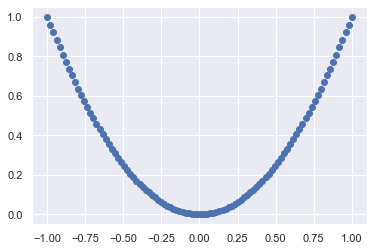

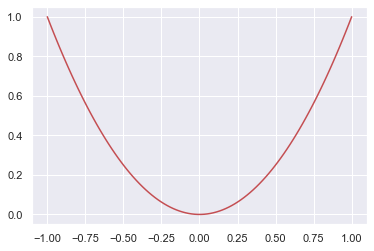

In [66]:
#1
x = np.linspace(-1,1,100)
y = x**2
print(x)
#2
plt.scatter(x, y)
plt.show()
#3
plt.plot(x, y, 'r')

* 2번

<ipython-input-71-74ec7e3b47fd>:8: RuntimeWarning: divide by zero encountered in log
  plt.scatter(x, np.log(x), s=5)


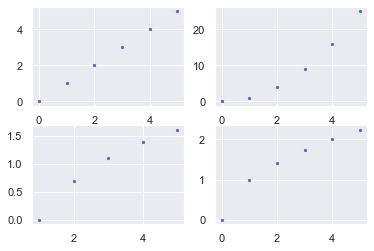

In [71]:
#1
x = np.arange(0,6)
plt.subplot(221)
plt.scatter(x, x, s=5)
plt.subplot(222)
plt.scatter(x, x**2, s=5)
plt.subplot(223)
plt.scatter(x, np.log(x), s=5)
plt.subplot(224)
plt.scatter(x, np.sqrt(x), s=5)
plt.show()

<ipython-input-77-1fd48b68236f>:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, np.log(x), color = 'blue')


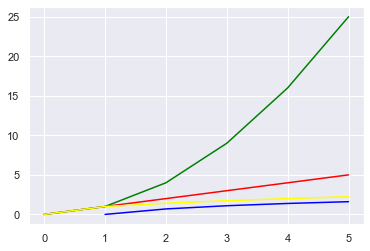

In [77]:
#2
x = np.arange(0,6)
plt.plot(x, x, color = 'red')
plt.plot(x, x**2, color = 'green')
plt.plot(x, np.log(x), color = 'blue')
plt.plot(x, np.sqrt(x), color = 'yellow')
plt.show()

<ipython-input-81-01c16384dcd6>:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, np.log(x), color = 'blue', linestyle='-.')


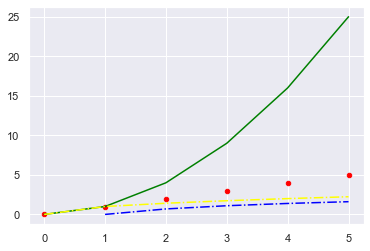

In [81]:
#3
x = np.arange(0,6)
plt.scatter(x, x, s=20, color = 'red')
plt.plot(x, x**2, color = 'green')
plt.plot(x, np.log(x), color = 'blue', linestyle='-.')
plt.plot(x, np.sqrt(x), color = 'yellow', linestyle='-.')
plt.show()

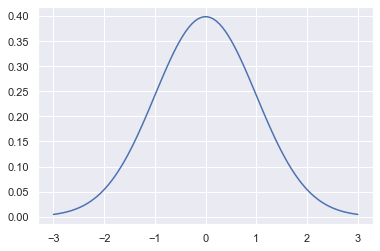

In [83]:
#5-a
x = np.linspace(-3,3,100)
y = (1/np.sqrt(2*np.pi))*np.exp(-x**2/2)
plt.plot(x, y)

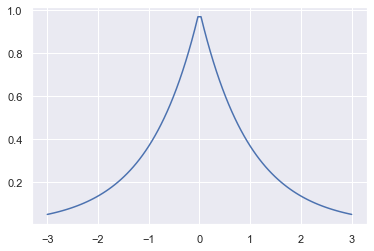

In [85]:
#5-b
x = np.linspace(-3,3,100)
y = np.exp(-np.abs(x))        #절대값 np.abs(x)
plt.plot(x,y)

<BarContainer object of 6 artists>

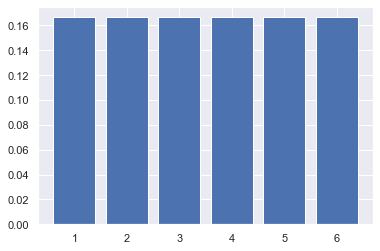

In [89]:
#7 
# P(x=j) = 1/6, j=1~6 인 X의 확률질량함수를 그래프로 나타내시오. 
x = [1,2,3,4,5,6]
y = 1/6
plt.bar(x,y)

In [90]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [91]:
#10-a
iris.mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [96]:
iris.groupby(iris['species']).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


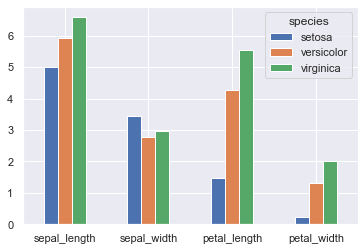

In [103]:
A = iris.groupby(iris['species']).mean()
A.T.plot.bar(rot=0) #rot=0 변수명의 기울기 값, A.T 즉, 전치를 사용해서 다르게 표현할 수도 있음
plt.show()

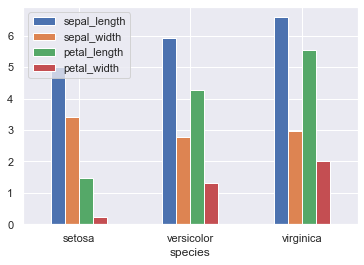

In [104]:
A.plot.bar(rot=0)
plt.show()

|Plot 메서드의 인수값들|
bar, pie, hist, kde, box, scatter, area

In [105]:
A

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [106]:
A.T

species,setosa,versicolor,virginica
sepal_length,5.006,5.936,6.588
sepal_width,3.428,2.770,2.974
petal_length,1.462,4.260,5.552
petal_width,0.246,1.326,2.026


In [109]:
#12
import pandas as pd

A = pd.DataFrame({
    'stretch' : [46,54,48,50,44,42,52],
    'distance' : [183,217,189,208,178,150,249]
})

B = pd.DataFrame({
    'stretch' : [25,45,35,40,55,60],
    'distance' : [71,196,127,187,249,291]
})

#일 때, a,b 두 집합을 합해서 x축을 stretch로 하여 산점도를 그리는데, 
#점 모양은 집합에 따라 'a','b'로 찍히도록 그래프를 그리시오.

In [110]:
A

,stretch,distance
0,46,183
1,54,217
2,48,189
3,50,208
4,44,178
5,42,150
6,52,249


In [148]:
C = pd.concat([A,B],axis=0)
C['group'] = ['a','a','a','a','a','a','a','b','b','b','b','b','b']
C = C.reset_index(drop=True)
C

,stretch,distance,group
0,46,183,a
1,54,217,a
2,48,189,a
3,50,208,a
4,44,178,a
5,42,150,a
6,52,249,a
7,25,71,b
8,45,196,b
9,35,127,b


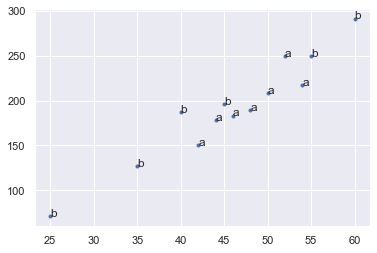

In [152]:
plt.scatter('stretch', 'distance', marker='.', data=C)
for i in range(len(C)):
    plt.annotate(C.group[i], xy=(C.stretch[i], C.distance[i]))
plt.show()

# 4장. 난수 발생과 모의 실험

### pmf  확률질량함수(probability mass function)
### pdf   확률밀도함수(probability density function)
### cdf   누적분포함수(cumulative distribution function)
### ppf   퍼센트포인트(percent point function)
### rvs   난수(random number)
### sf     생존함수(surviveal function) S(x) = 1- P(X<=x) = P(X>x)

* 함수
### loc=mean, scale=sdv

* norm.pdf(loc=0, scale=1, x=xvalue)   # f(x)
* norm.cdf(loc=0, scale=1, x=xvalue)   # P(X<=x)
* norm.sf(loc=0, scale=1, x=xvalue)   # P(X>x)
* norm.ppf(loc=0, scale=1, q=pvalue)
* norm.ppf(loc=0, scale=1, q=1-pvalue)
* norm.rvs(loc=0, scale=1, size=number)   #number 개수만큼 난수 발생

### 예제) Z~N(0,1)일때, P(Z<=-1)구하기

In [36]:
from scipy import stats
stats.norm.cdf(loc=0, scale=1, x=-1)
# 이 값을 나타내는 그래프를 그려보자

0.15865525393145707

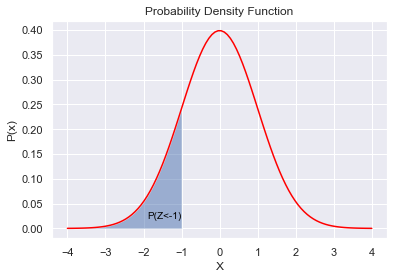

In [159]:
mu = 0
sigma = 1
x = np.linspace(mu-4*sigma, mu+4*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

xx = np.linspace(mu-4*sigma, mu-sigma, 100)
yy = stats.norm.pdf(xx, mu, sigma)

plt.plot(x,y,'red')
plt.title('Probability Density Function')
plt.xlabel('X') ; plt.ylabel('P(x)')
plt.fill_between(xx,yy,alpha=0.5)
plt.text(-1.9, 0.02, 'P(Z<-1)', color='black', fontsize=10)
plt.show()

### 예제) Z~N(0,1)일때, P(Z>-1)구하기

In [162]:
stats.norm.sf(loc=0,scale=1,x=-1)
# 해당값을 그래프로 그려보자

0.8413447460685429

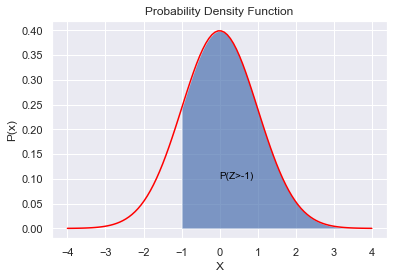

In [163]:
xx = np.linspace(mu-sigma, mu+4*sigma, 100)
yy = stats.norm.pdf(xx, mu, sigma)

plt.plot(x,y,'red')
plt.title('Probability Density Function')
plt.xlabel('X') ; plt.ylabel('P(x)')
plt.fill_between(xx,yy,alpha=0.7)
plt.text(0, 0.1, 'P(Z>-1)', color='black', fontsize=10)
plt.show()

### 평균 100, 표준편차 10인 정규분포로부터 난수 열 개 발생

In [164]:
stats.norm.rvs(loc=100, scale=10, size=10)

array([ 79.72273653,  90.34676239,  92.81967348, 100.30970533,
       102.49297762,  95.7851624 , 106.9590073 ,  91.76440606,
       110.55638197,  93.4925498 ])

### 평균 280, 표준편차 10인 정규분포를 따르르는 X, P(X<=270) 구하기

* 작은건 ==> cdf,     큰건 ==> sf

In [165]:
stats.norm.cdf(loc=280, scale=10, x=270)

0.15865525393145707

### 이 집단에서 아래로부터(왼쪽) 10%에 해당하는 값 구하기

In [167]:
stats.norm.ppf(loc=280, scale=10, q=0.1)

267.184484344554

### 이 집단에서 위로부터(오른쪽) 10%에 해당하는 값 구하기

In [168]:
stats.norm.ppf(loc=280, scale=10, q=0.9)

292.815515655446

### 평균 0, 표준편차 1

* 1) 왼쪽으로부터의 확률이 0.05가 되는 값 q1을 구하라
* 2) 왼쪽으로부터의 확률이 0.95가 되는 값 q2을 구하라
* 3) x = 0에서의 확률밀도함수값 f(0)을 구하라

In [169]:
stats.norm.ppf(loc=0, scale=1, q=0.05)

-1.6448536269514729

In [170]:
stats.norm.ppf(loc=0, scale=1, q=0.95)

1.6448536269514722

In [171]:
stats.norm.pdf(loc=0, scale=1, x=0)

0.3989422804014327

### 표준정규분포로부터 발생한 난수 100개로 히스토그램 그리기

In [173]:
RVS = stats.norm.rvs(loc=0, scale=1, size=100)

(array([ 2.,  2.,  8., 15., 18., 20., 21.,  9.,  4.,  1.]),
 array([-2.5885632 , -2.08343981, -1.57831642, -1.07319303, -0.56806964,
        -0.06294624,  0.44217715,  0.94730054,  1.45242393,  1.95754732,
         2.46267072]),
 <BarContainer object of 10 artists>)

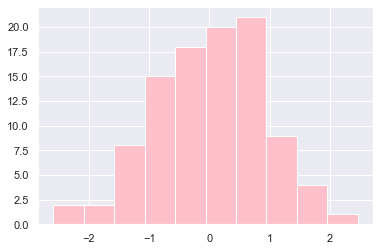

In [177]:
plt.hist(RVS, color='pink')

### t분포

#### t.pdf(df=dfvalue, x=xvalue)
#### t.cdf(df=dfvalue, x=xvalue)
#### t.sf(df=dfvalue, x=xvalue)
#### t.ppf(df=dfvalue, q=qvalue)
#### t.rvs(df=dfvalue, size=number)

### 자유도가 5인 t 분포의 pdf와 표준정규분포의 pdf 함께 그리기

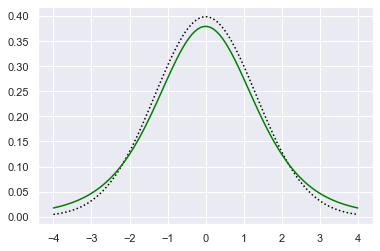

In [184]:
a = np.linspace(-3, 3, 100)
plt.plot(x, stats.norm.pdf(a), color='black', linestyle='dotted')
# 평균, 표준편차 안 써줘도 normal distribution을 만들어줌
plt.plot(x, stats.t.pdf(a, df=5), color='green')

#### 자유도가 5인 t분포를 따르는 난수 3개 발생

In [185]:
stats.t.rvs(df=5, size=3)

array([-0.35689139, -0.39615751,  1.53665372])

#### 자유도가 5인 t분포를 따르는 X, P(X<=2) 구하기

In [186]:
stats.t.cdf(df=5, x=2)

0.9490302605850708

#### 자유도가 5인 t분포를 따르는 X, P(X>2) 구하기

In [187]:
stats.t.sf(df=5, x=2)

0.05096973941492914

#### 자유도가 5인 t분포를 따르는 X, P(-1< X <1.5) 구하기

In [188]:
stats.t.cdf(df=5, x=1.5) - stats.t.cdf(df=5, x=-1)

0.7214394260542021

#### 자유도가 5인 t분포를 따르는 X, 아래로부터(왼쪽꼬리) 10% 해당값 구하기

In [189]:
stats.t.ppf(df=5, q=0.1)

-1.475884048782027

## 균일분포 (모수 [a, b] 구간을 설정해줘야 함)

#### uniform.pdf(loc=a, scale=b, x=xvalue)
#### uniform.cdf(loc=a, scale=b, x=xvalue)
#### uniform.sf(loc=a, scale=b, x=xvalue)
#### uniform.ppf(loc=a, scale=b, q=qvalue)
#### uniform.rvs(loc=a, scale=b, size=number)

#### [0,1]에서 균일분포로부터 난수 10개를 생성, 이 표본에 대한 평균 구하기

In [190]:
stats.uniform.rvs(loc=0, scale=1, size=10).mean()

0.33405121765294876

#### [0,1]에서 균일분포를 따르는 X, P(X<=0.5) 구하기

In [192]:
stats.uniform.cdf(loc=0, scale=1, x=0.5)

0.5

#### [1,5]에서 균일분포를 따르는 X, P(X>2) 구하기

In [193]:
stats.uniform.sf(loc=1, scale=5, x=2)

0.8

#### [0,1]에서 균일분포를 따르는 X, P(0.2<X<=0.6) 구하기

In [195]:
stats.uniform.cdf(loc=0, scale=1, x=0.6) - stats.uniform.cdf(loc=0, scale=1, x=0.2)

0.39999999999999997

#### [0,1]에서 균일분포의 확률밀도함수와 누적분포함수 그리기

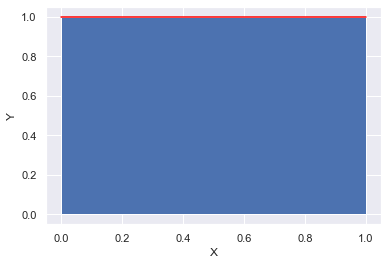

In [199]:
x = np.linspace(0,1,10)
y = stats.uniform.pdf(loc=0, scale=1, x=x)
plt.plot(x,y,'red')
plt.xlabel('X');plt.ylabel('Y')
plt.fill_between(x,y)

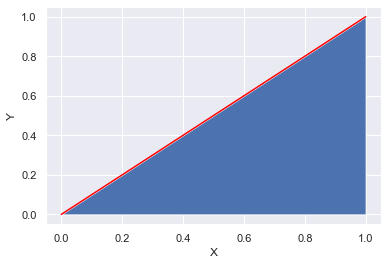

In [200]:
y = stats.uniform.cdf(loc=0, scale=1, x=x)
plt.plot(x,y,'red')
plt.xlabel('X');plt.ylabel('Y')
plt.fill_between(x,y)


## 지수분포, (발생비율 즉, 평균을 지정해줘야 함)

#### expon.pdf(scale=m, x=xvalue)
#### expon.cdf(scale=m, x=xvalue)
#### expon.sf(scale=m, x=xvalue)
#### expon.ppf(scale=m, q=qvalue)
#### expon.rvs(scale=m, size=number)

#### 평균 3인 지수분포로부터 난수 100개를 생성, 평균 구하기

In [201]:
stats.expon.rvs(scale=3, size=100).mean()

3.492250791314986

#### 평균 3인 지수분포를 따르는 X, P(X<=3) 구하기

In [202]:
stats.expon.cdf(scale=3, x=3)

0.6321205588285577

#### 평균 3인 지수분포를 따르는 X, P(X>2) 구하기

In [204]:
stats.expon.sf(scale=3, x=2)

0.513417119032592

In [205]:
# P(0.2<X<=1)
stats.expon.cdf(scale=3, x=1) - stats.expon.cdf(scale=3, x=0.2)

0.21897567445782845

#### 평균 1인 지수분포와 평균 3인 지수분포로 확률밀도함수 함께 그리기

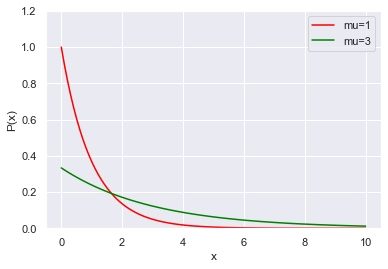

In [209]:
x = np.linspace(0,10,100)
y1 = stats.expon.pdf(scale=1, x=x)
y2 = stats.expon.pdf(scale=3, x=x)

plt.plot(x,y1,'red', label='mu=1')
plt.plot(x,y2,'green', label='mu=3')

plt.ylim(0, 1.2)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend()
plt.show()

## $F$분포 (분자자유도, 분모자유도를 설정해줘야함)

#### f.pdf(dfn=d1, dfd=d2, x=xvalue)
#### f.cdf(dfn=d1, dfd=d2, x=xvalue)
#### f.sf(dfn=d1, dfd=d2, x=xvalue)
#### f.ppf(dfn=d1, dfd=d2, q=qvalue)
#### f.rvs(dfn=d1, dfd=d2, size=number)

#### 분자자유도 3, 분모자유도 10인 F분포로부터 난수 4개 생성, 평균구하기

In [210]:
stats.f.rvs(dfn=3, dfd=10, size=4).mean()

0.8733653423713504

In [211]:
# P(X<=3)
stats.f.cdf(dfn=3, dfd=10, x=3)

0.9182530481901752

In [212]:
# P(X>2)
stats.f.sf(dfn=3, dfd=10, x=2)

0.17800740737517542

In [213]:
# P(0.2<X<=1)
stats.f.cdf(dfn=3, dfd=10, x=1) - stats.f.cdf(dfn=3, dfd=10, x=0.2)

0.46168090839902376

In [214]:
# 왼쪽으로부터 95% 값 구하기
stats.f.ppf(dfn=3, dfd=10, q=0.95)

3.7082648190468435

In [215]:
# 왼쪽으로부터 5% 값 구하기
stats.f.ppf(dfn=3, dfd=10, q=0.05)

0.11382359425864687

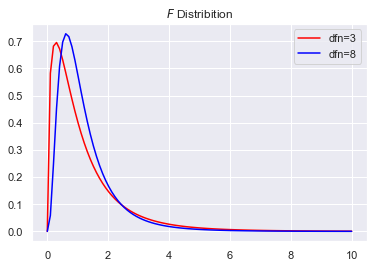

In [217]:
# 분자자유도 3, 8, 분모자유도 10인 F분포 확률밀도함수 그리기
x = np.linspace(0,10,100)
y1 = stats.f.pdf(dfn=3, dfd=10, x=x)
y2 = stats.f.pdf(dfn=8, dfd=10, x=x)

plt.plot(x,y1,'red', label='dfn=3')
plt.plot(x,y2,'blue', label='dfn=8')
plt.title('$F$ Distribition')
plt.legend()
plt.show()

## 카이제곱분포 (자유도 k를 설정해줘야함)

#### chi2.pdf(df=k, x=xvalue)
#### chi2.cdf(df=k, x=xvalue)
#### chi2.sf(df=k, x=xvalue)
#### chi2.ppf(df=k, q=qvalue)
#### chi2.rvs(df=k, size=number)

In [218]:
# 자유도 8인 카이제곱분포로부터 3개 난수
stats.chi2.rvs(df=8, size=3)

array([6.23973224, 1.32840747, 4.53619677])

In [219]:
# 자유도 8인 chi2, P(X<=3)
stats.chi2.cdf(df=8, x=3)

0.06564245437845008

In [220]:
## 자유도 8인 chi2, P(X>2)
stats.chi2.sf(df=8, x=2)

0.9810118431238462

In [221]:
# 자유도 8인 chi2, P(0.2<X<=1)
stats.chi2.cdf(df=8, x=1) - stats.chi2.cdf(df=8, x=0.2)

0.0017477757223654789

In [223]:
# 자유도 8인 chi2, 95% 해당값 구하기
stats.chi2.ppf(df=8, q=0.95)

15.50731305586545

In [224]:
# 자유도 8인 chi2, 5% 해당값 구하기
stats.chi2.ppf(df=8, q=0.05)

2.732636793499662

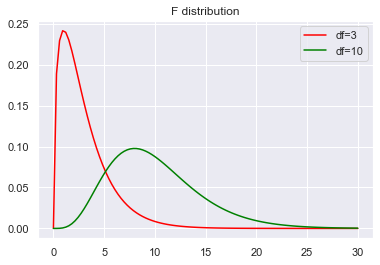

In [226]:
# 자유도 3인 chi2, 자유도 10인 chi2의 확률밀도함수 그리기
x= np.linspace(0, 30, 100)
y1 = stats.chi2.pdf(df=3, x=x)
y2 = stats.chi2.pdf(df=10, x=x)

plt.plot(x,y1,'red', label='df=3')
plt.plot(x,y2,'green', label='df=10')
plt.title('F distribution')
plt.legend()
plt.show()

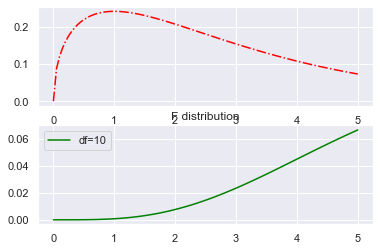

In [230]:
# 자유도 3인 chi2와 자유도 10인 chi2 x축 맞춰서 그리기
x= np.linspace(0, 5, 100)
y1 = stats.chi2.pdf(df=3, x=x)
y2 = stats.chi2.pdf(df=10, x=x)

plt.subplot(211)
plt.plot(x,y1,'red', linestyle='-.', label='df=3')
plt.subplot(212)
plt.plot(x,y2,'green', label='df=10')
plt.title('F distribution')
plt.legend()
plt.show()

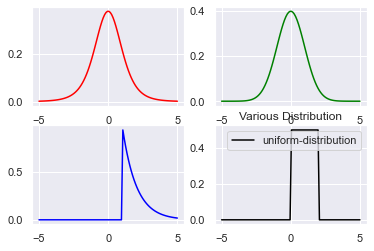

In [234]:
# 자유도 5인
# 1) t분포, 
# 2) 표준정규분포, 
# 3) 평균1인 지수분포,
# 4) [0,2]에서의 균일분포에 대한
# 확률밀도함수 그리기

x = np.linspace(-5,5,100)
y1 = stats.t.pdf(df=5, x=x)
y2 = stats.norm.pdf(x=x)
y3 = stats.expon.pdf(x=x, loc=1)
y4 = stats.uniform.pdf(x=x, loc=0, scale=2)

plt.subplot(221)
plt.plot(x,y1,'red',label='t-distribution')
plt.subplot(222)
plt.plot(x,y2,'green',label='normal-distribution')
plt.subplot(223)
plt.plot(x,y3,'blue',label='exponential-distribution')
plt.subplot(224)
plt.plot(x,y4,'black',label='uniform-distribution')
plt.legend()
plt.title('Various Distribution')
plt.show()

## 이산분포 (모수B(n,p)를 지정해줘야 함)

#### binom.pmf(n=n, p=prob, k=xvalue)   : 확률밀도함수가 아닌, 확률질량함수임
#### binom.cdf(n=n, p=prob, k=xvalue)
#### binom.sf(n=n, p=prob, k=xvalue)
#### binom.ppf(n=n, p=prob, q=qvalue)
#### binom.rvs(n=n, p=prob, size=number)

In [236]:
# 10회 독립시행이며 성공확률이 0.3인 이항분포
# 0,1,2,3,4,5 값에 대한 확률값을 구하시오
stats.binom.pmf(n=10, p=0.3, k=[0,1,2,3,4,5])

array([0.02824752, 0.12106082, 0.23347444, 0.26682793, 0.20012095,
       0.10291935])

In [237]:
# x값이 (1,3,6)일 경우, 각 값까지 누적확률 구하기
stats.binom.pmf(n=10, p=0.3, k=[1,3,6])

array([0.12106082, 0.26682793, 0.03675691])

In [238]:
# 0.2, 0.5, 0.8의 누적확률을 갖는 확률변수값 구하기
stats.binom.ppf(n=10, p=0.3, q=[0.2, 0.5, 0.8])

array([2., 3., 4.])

In [239]:
# 이항분포 B(10, 0.3)을 따르는 난수 5개 얻기
stats.binom.rvs(n=10, p=0.3, size=5)

array([3, 1, 2, 4, 4])

## 이산분포 (모수 평균 mu를 지정해줘야 함)

#### poisson.pmf(mu=muvalue, k=xvalue)   : 확률밀도함수가 아닌, 확률질량함수임
#### poisson.cdf(mu=muvalue, k=xvalue)
#### poisson.ppf(mu=muvalue, q=qvalue)
#### poisson.rvs(mu=muvalue, size=number)

In [8]:
# 평균이 3인 포아송 분포를 따르는 0,1,2,3,4,5 값에 대한 확률값을 구하라
stats.poisson.pmf(mu=3, k=[0,1,2,3,4,5])

array([0.04978707, 0.14936121, 0.22404181, 0.22404181, 0.16803136,
       0.10081881])

In [9]:
# 평균 3인 포아송, x = 1,3,6일 경우 각 값까지의 누적확률
stats.poisson.cdf(mu=3, k=[1,3,6])

array([0.19914827, 0.64723189, 0.96649146])

In [10]:
#평균 3인 포아송 분포, 0.2, 0.5, 0.8의 누적확률을 갖는 확률변수 값을 구하라
stats.poisson.ppf(mu=3, q=[0.2, 0.5, 0.8])

array([2., 3., 4.])

In [11]:
#평균 3인 포아송, 난수 5개 얻기
stats.poisson.rvs(mu=3, size=5)

array([3, 1, 7, 6, 5])

In [12]:
#평균 3인 포아송, P(X<=3) 구하기
stats.poisson.cdf(mu=3, k=3)

0.6472318887822313

In [13]:
#평균 3인 포아송, P(X>4) 구하기
1 - stats.poisson.cdf(mu=3, k=3)

0.35276811121776874

In [15]:
#평균 3인 포아송, P(3<=X<=5) 구하기
stats.poisson.cdf(mu=3,k=5) - stats.poisson.cdf(mu=3,k=2)

0.49289197684185293

In [16]:
#평균 3인 포아송, P(X>5) 구하기
1 - stats.poisson.cdf(mu=3,k=5)

0.08391794203130343

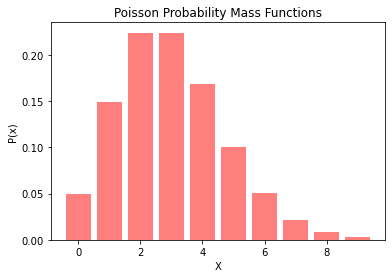

In [26]:
#평균 3인 포아송, 확률질량함수 구하기
bins = np.arange(0,10,1)   #연속형 변수가 아니기 때문에, np.linspace가 아니라 arange로
y = stats.poisson.pmf(mu=3, k=x)
plt.bar(bins,y,color='red', alpha=0.5)
plt.title('Poisson Probability Mass Functions')
plt.xlabel('X');plt.ylabel('P(x)')
plt.show()

(array([ 0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

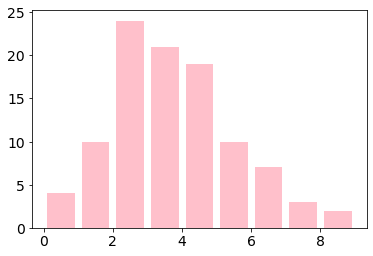

In [31]:
#평균이 3인 포아송 분포를 따르는 난수 100개, 도수분포 그래프를 그려라
y = stats.poisson.rvs(mu=3, size=100)
bins = np.arange(0,10,1)

hist, bins = np.histogram(y, x) #도수 및 분포구간을 return해줌

plt.hist(y, x, rwidth=0.8, color='pink')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# 히스토그램을 이용한 정규성 검토

### 정규분포의 랜덤 표본의 히스토그램이 다양하다는 것을 알 수 있음

In [32]:
#표준정규분포에서 난수 발생으로 표본에 대해 히스토그램 그리기

from scipy.stats import probplot

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([3., 4., 3., 5., 9., 7., 7., 4., 5., 3.]),
 array([-2.25138427, -1.8524359 , -1.45348753, -1.05453916, -0.65559079,
        -0.25664241,  0.14230596,  0.54125433,  0.9402027 ,  1.33915108,
         1.73809945]),
 <BarContainer object of 10 artists>)

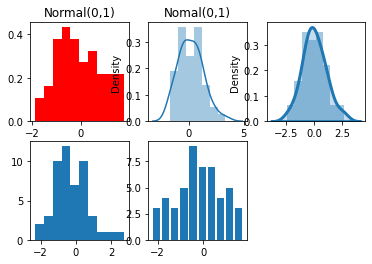

In [33]:
n = 50
x1 = np.random.normal(0,1,n)
x2 = np.random.normal(0,1,n)
x3 = np.random.normal(0,1,n)
x4 = np.random.normal(0,1,n)
x5 = np.random.normal(0,1,n)

plt.subplot(231)
plt.hist(x1, density=True, color='r')
plt.title('Normal(0,1)')

plt.subplot(232)
sns.distplot(x2)
plt.title('Nomal(0,1)')

plt.subplot(233)
sns.distplot(x3, hist=True, kde=True, kde_kws={'shade':True, 'linewidth':3})

plt.subplot(234)
plt.hist(x4)

plt.subplot(235)
plt.hist(x5, histtype='bar', rwidth=0.8)

# Q-Q plot을 통해 정규성 확인하기

qqplot은 분위수대조도로 불리며 정규모집단 가정을 하는 방법 중 하나이며 수집 데이터를 표준정규분포의 분위수와 비교하여 그리는 그래프입니다.

이는 간단하게 데이터의 정규성 가정에 대한 검토를 가능하게 해줍니다.
만일, 모집단이 정규성을 따른다면 QQplot은 직선의 형태로 그려지게 됩니다.

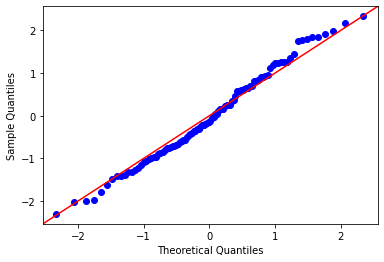

numpy.ndarray

In [14]:
import statsmodels.api as sm
import pylab as py

data_n = np.random.normal(0,1,100)
sm.qqplot(data_n, line='45')
plt.show()
type(data_n)
# 정규분포에서 발생한 랜덤 데이터에 대한 Q-Q Plot

# 데이터 검정통계량을 이용한 정규성 검정

In [36]:
# H0 : 정규분포를 따른다 에 대해 H1 : 정규분포를 따르지 않는다.
# 라는 가설에 대한 shapiro 검정은 stats.shapiro() 함수를 이용한다.
# 그 결과로 검정통계량과 p-값을 출력한다

In [37]:
x = stats.norm.rvs(0,1,size=10)
stats.shapiro(x)

ShapiroResult(statistic=0.8858590722084045, pvalue=0.15223754942417145)

In [38]:
# 검정통계량 W=0.885, p-값 = 0.15223 > 0.05이므로 유의수준 5%에서 H0를 기각하지 못한다.
# 그러므로 데이터 x는 정규분포를 따른다고 할 수 있다.

* 여러 분포에서 발생한 랜덤 표본에 대한 정규성 검토

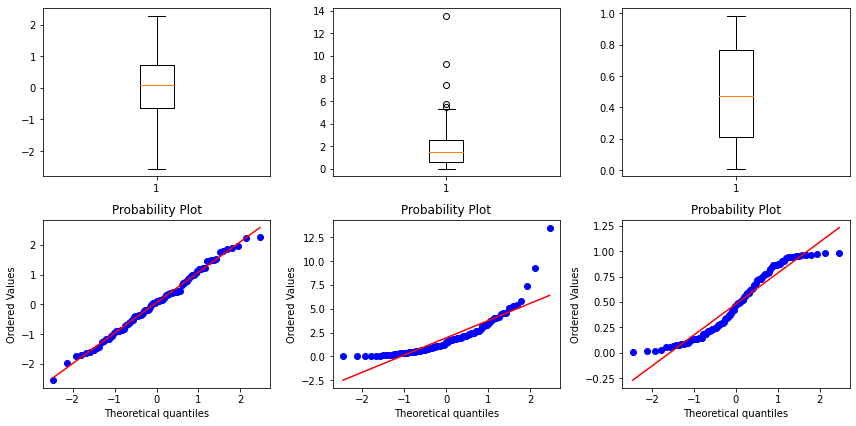

In [49]:
from scipy.stats import probplot

np.random.seed(0)
n=100
x1 = np.random.normal(0,1,n)
x2 = np.random.exponential(2,n)
x3 = np.random.uniform(0,1,n)

f=plt.subplots(2, 3, figsize=(12,6))

plt.subplot(231)
plt.boxplot(x1)
plt.subplot(232)
plt.boxplot(x2)
plt.subplot(233)
plt.boxplot(x3)

plt.subplot(234)
probplot(x1, plot=plt)
plt.subplot(235)
probplot(x2, plot=plt)
plt.subplot(236)
probplot(x3, plot=plt)

plt.tight_layout()
plt.show()


# 모의실험

* 이항분포의 정규분포근사

In [50]:
# 데이터가 이항분포에서 발생했을 경우, 정규분포를 따르도록 근사되기 위해서는 어느정도의 시행 크기가 필요한지 살펴보자
# X~B(n,p)일 경우, n이 충분히 크면 근사적으로 X~N(np, np(1-p))를 따른다

* 함수 정의 후 히스토그램 및 확률밀도함수선 그리기

In [51]:
#X~B(n,p)분포로부터 p=0.7, n=3,7,10,20  인 경우 각각 100번 실험 후 히스토그램을 그리고 X~N(np,np(1-p))인 확률밀도함수선을 그려보자

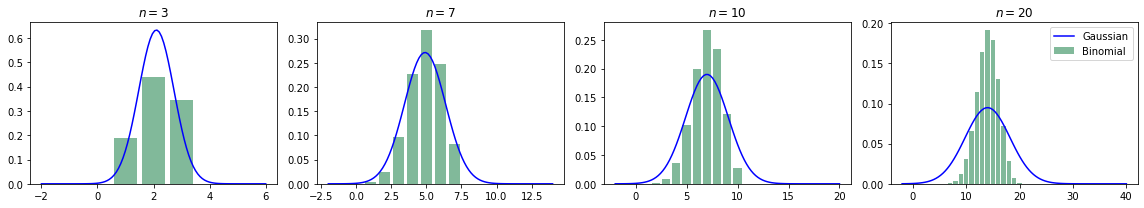

In [58]:
n_list=[3,7,10,20]
p = 0.7
k_list = [np.arange(1,n+1) for n in n_list]
x_list = [np.linspace(-2,2*n,100) for n in n_list]

fig, ax_list = plt.subplots(1, len(n_list), figsize= (4*len(n_list),3))

for i, n in enumerate(n_list):
    ax = ax_list[i]
    binom_p = stats.binom.pmf(k_list[i], n, p)
    gauss_p = stats.norm.pdf(x_list[i], n*p, n*p*(1-p))
    ax.bar(k_list[i], binom_p, color='seagreen', alpha=0.6, label='Binomial')
    ax.plot(x_list[i], gauss_p, label='Gaussian', color='blue')
    ax.set_title('$n=%d$'%n)
ax.legend()
fig.tight_layout()

In [59]:
# 대략 np>=5, np(1-p)>=5인 경우 이항분포의 정규분포근사가 유효하다고 알려져있다.
# 그림을 봐도, n=10,20 일때 정규분포모양을 따라가는 듯이 보임
# 즉, n이 커질수록 메르누이 시행의 합인 이항분포가 정규분포로 근사해가는 것을 알 수 있다.

# 중심극한정리와 모의실험

In [60]:
# 중심극한정리 : 표본의 크기가 충분히 크면, 동일한 분포에서 얻어진 확률표본평균과 합은 정규분포로 근사한다.

* 균일분포의 확률밀도함수선 그리기

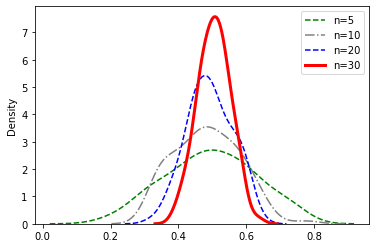

In [75]:
# X~Unif[0,1] 균일분포로부터 n=5,10,20,30인 경우, 각각 100번 실험 후, 얻은 평균값에 대해 확률밀도함수선을 그려보자

def sampling2pdf(n,m=100):
    mean_of_samples=[]

    for i in range(m):
        samples = stats.uniform.rvs(loc=0, scale=1, size=n)
        mean_of_samples.append(np.mean(samples))
    return mean_of_samples

samples1 = sampling2pdf(5)
samples2 = sampling2pdf(10)
samples3 = sampling2pdf(20)
samples4 = sampling2pdf(30)

sns.kdeplot(samples1, color='green', label='n=5', linestyle='--')
sns.kdeplot(samples2, color='gray', label='n=10', linestyle='-.')
sns.kdeplot(samples3, color='blue', label='n=20', linestyle='dashed')
sns.kdeplot(samples4, color='red', label='n=30', linestyle='solid', linewidth=3)

plt.legend()
plt.show()

# 연습문제

[  0.07301424   2.65345603  10.133007     2.60048593 -10.42100922
  -1.19950863   4.0909277   -5.05753013   3.86401594   9.06013251
   7.76731003  -0.42661587   3.71300291  -4.04495054   8.19142371
  -2.78287768   0.61907492   7.4601396   -1.10646022   7.03177649]
2.110940735397727 5.2390089747972475


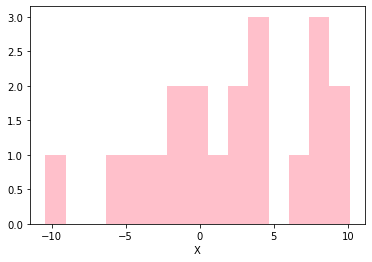

In [77]:
#1 N(3,5^2)을 따르는 랜덤 데이터 20개를 발생시켜 rand로 저장하시오
rand = stats.norm.rvs(loc=3, scale=5, size=20)

#a rand 값을 출력하시오
print(rand)

#b rand의 평균과 표준편차를 구하시오
print(rand.mean(), rand.std())

#c 히스토그램을 그리시오
plt.hist(rand, bins=15, color='pink', label='nomal histogram')
plt.xlabel('X')
plt.show()

[3 3 2 3 5 3 2 1 6 2]
3.0 1.4142135623730951


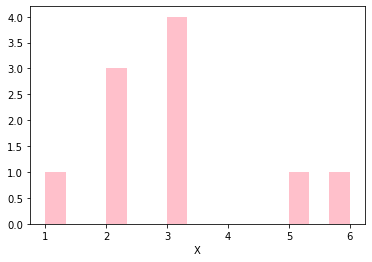

In [79]:
#2 평균 3인 포아송 분포를 따르는 랜덤 데이터 10개를 발생시켜 rand_p로 저장하시오
rand_p = stats.poisson.rvs(mu=3, size=10)

#a
print(rand_p)

#b
print(rand_p.mean(), rand_p.std())

#c
plt.hist(rand_p, bins=15, color='pink', label='nomal histogram')
plt.xlabel('X')
plt.show()

In [86]:
#3 확률값을 구하고자 한다

#a) 평균10, 표준편차 3인 정규분포를 따르는 변수 Z에 대해 P(Z>=a)=0.4인 a값을 구하도록 명령문과 결과를 쓰시오
print(stats.norm.ppf(loc=10, scale=3, q=0.6))

#b) 평균10, 표준편차 3인 Z, P(Z>=12)를 구하도록
print(1-stats.norm.cdf(loc=10, scale=3, x=12))
print(stats.norm.sf(loc=10, scale=3, x=12))

#c) 평균10, 표준편차 3인 Z, P(|Z|<=11.5)를 구하도록 ==>          -11.5 <= Z <=11.5
print(stats.norm.cdf(loc=10, scale=3, x=11.5)-stats.norm.cdf(loc=10, scale=3, x=-11.5))


10.760041309407399
0.2524925375469229
0.2524925375469229
0.6914624612736289


In [90]:
#4 Z~N(0,1)인 경우
#a) P(-b<=Z<=b)=0.90을 만족하는 b를 구해보자
print(stats.norm.ppf(loc=0, scale=1, q=0.95))

#b P(-c<=Z<=c)=0.95를 만족하는 c를 구해보자
print(stats.norm.ppf(loc=0, scale=1, q=0.975))

1.6448536269514722
1.959963984540054


In [94]:
#5 주사위를 5번 던질 때, 6이 세번 이상 나올 확률을 구하시오
print(stats.binom.sf(n=5, p=1/6, k=2))

0.03549382716049382


In [96]:
#6 공평한 동전을 10,000번 던졌을 때, 앞면이 4980 이상 5020이하만큼 나올 확률을 구하시오

stats.binom.cdf(n=10000, p=1/2, k=5020)-stats.binom.cdf(n=10000, p=1/2, k=4979)

0.3181919670623352

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


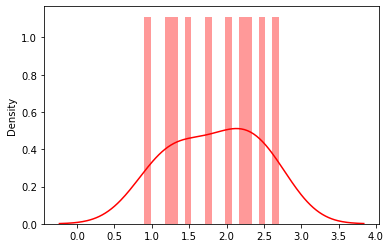

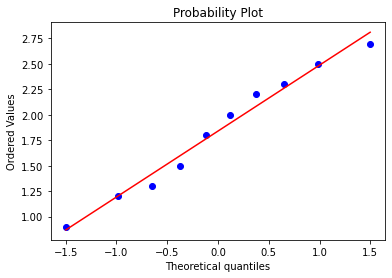

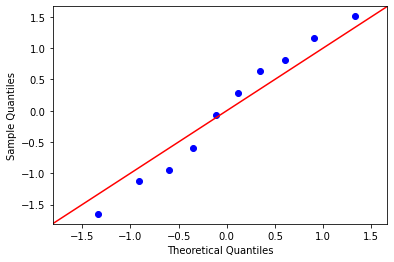

1.8400000000000003
0.32439999999999997
0.5695612346359257


In [129]:
#9 아래 데이터는 사용한 기계의 배터리를 재충전하는 데 걸리는 시간이다
data = np.array([1.5, 2.2, 0.9, 1.3, 2.0, 1.2, 2.5, 2.7, 1.8, 2.3])

#a 히스토그램을 그리고 분포에 대해 설명하시오.
sns.distplot(data, color='red', bins=20)
plt.show()
# X는 [0,1]에서 균일을 따른다.

#b Q-Q그림을 그리고 정규성 여부에 대해 설명하시오.
# 왜 두 결과값이 다를까?
import statsmodels.api as sm
stats.probplot(data, plot=plt)
plt.show()

sm.qqplot(data, fit=True, line='45')
plt.show()
# X는 정규성 여부를 충족하지 못함

#c shapiro 검정으로 유의수준 0.05에서 정규성 검정을 하시오.
stats.shapiro(data)
#통계량은 0.96이나, p-값은 0.83으로 >0.05이기에, 정규성을 충족하지 못함

#d 평균, 분산, 표준편차를 구하시오
print(data.mean())
print(data.var())
print(data.std())

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


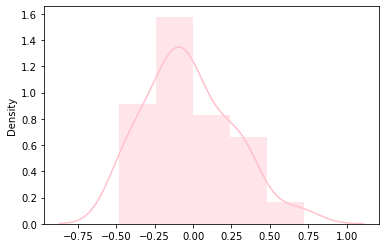

In [161]:
#11
#a 평균 0, 분산 2인 정규분포를 따르는 난수 30개를 발생시켜 x에 할당하시오
x = stats.norm.rvs(loc=0, scale=np.sqrt(2), size=30)

#b 데이터셋 50개를 만들어, 평균을 구하고, 평균으로 히스토그램을 그리시오
np.random.seed(0)
x_mean = []
for i in range(50):
    x = stats.norm.rvs(loc=0, scale=np.sqrt(2), size=30)
    x_mean.append(x.mean())

sns.distplot(x_mean, color='pink', bins=5)
plt.show()

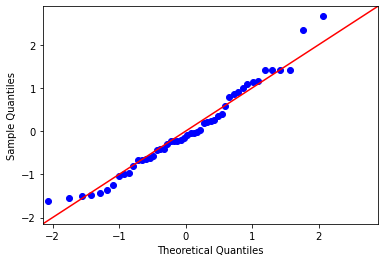

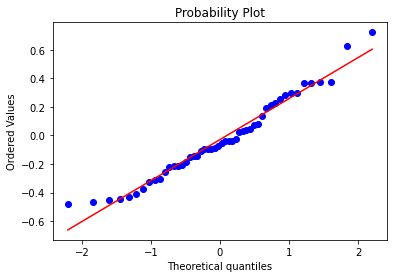

In [167]:
#c 각 데이터셋의 평균들이 정규분포를 따른다고 할 수 있는지 QQ그림을 그리시오

sm.qqplot(np.array(x_mean), fit=True, line='45')
py.show()


stats.probplot(x_mean, fit=True, plot=plt)
plt.show()

In [5]:
#d 평균이 3인 포아송분포를 따르는 난수30개를 발생시켜 y에 저장하시오

y = stats.poisson.rvs(mu=3, size=30)
print(y)

[4 3 5 0 4 3 2 3 5 3 1 3 5 5 4 0 0 5 3 0 5 3 8 0 3 1 0 6 2 3]


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


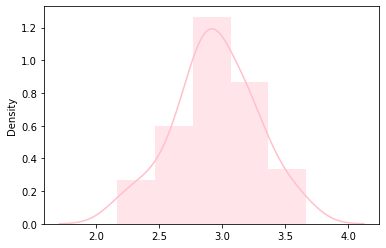

In [17]:
#e d와 같은 데이터셋 50개를 발생시켜, 50개의 평균들로 히스토그램을 그리시오

np.random.seed(0)
histlist = []

for i in range(50):
    y = stats.poisson.rvs(mu=3, size=30)
    histlist.append(y.mean())

sns.distplot(histlist, bins= 5, color='pink')
plt.show()

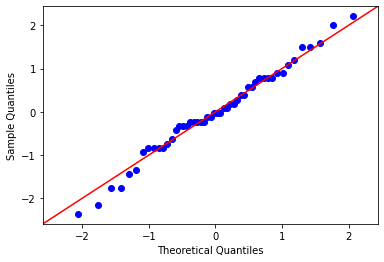

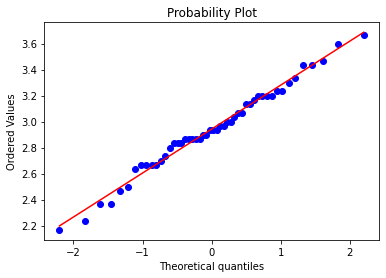

In [18]:
#f 각 데이터셋 평균들이 정규분포를 따른다고 할 수 있는지 qq플롯을 그리고 설명

sm.qqplot(np.array(histlist), fit=True, line='45')
py.show()


stats.probplot(histlist, fit=True, plot=plt)
plt.show()

In [25]:
from scipy.stats import probplot

In [26]:
#12 표준정규분포, 평균3인 지수분포로부터 100개, 지수분포를 따르는 데이터에
#자연로그를 취한것(np.logp)에 대해 각각 상자그림과 정규성 QQ그림을 그리시오.

np.random.seed(0)
n = 100
x1 = stats.norm.rvs(loc=0, scale=1, size=100)
x2 = stats.expon.rvs(scale=3, size=100)
x3 = np.log(x2)

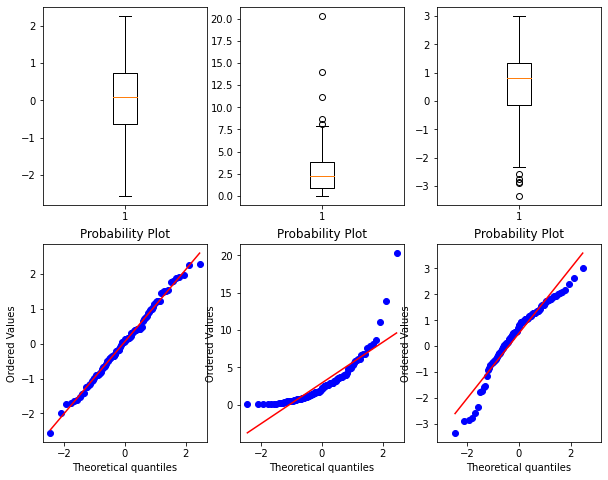

In [27]:
fig, ax = plt.subplots(2,3, figsize=(10,8))
ax[0][0].boxplot(x1)
probplot(x1, plot=ax[1][0])
ax[0][1].boxplot(x2)
probplot(x2, plot=ax[1][1])
ax[0][2].boxplot(x3)
probplot(x3, plot=ax[1][2])
plt.axis('equal')
plt.show()

# 5장. 일변량 데이터와 기술통계량

## 범주형 데이터

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

res = np.array(['y','n','y','y','y','n','n','y','y','y'])
df = pd.DataFrame(res, columns = ['res'])
df

,res
0,y
1,n
2,y
3,y
4,y
5,n
6,n
7,y
8,y
9,y


* 분할표

In [12]:
pd.crosstab(index=df['res'], columns='count')

col_0,count
res,
n,3
y,7


* 막대 그래프

In [46]:
cr = pd.crosstab(index=df['res'], columns='count')
y_pos = np.arange(len(cr))
y_pos

array([0, 1])

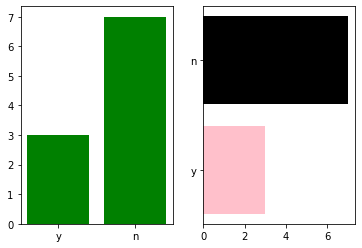

In [52]:
xlabel = ['y', 'n']
ax = plt.subplot(1,2,1)
plt.bar(y_pos, cr['count'],color='green')
plt.xticks(y_pos, xlabel)

plt.subplot(1,2,2)
plt.barh(y_pos, cr['count'], color=['pink', 'black'])
plt.yticks(y_pos, xlabel)
plt.show()

([<matplotlib.axis.XTick at 0x1a077749400>,
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E')])

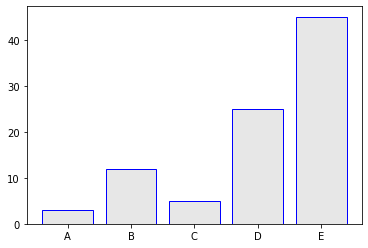

In [59]:
store = ('A','B','C','D','E')
sales = [3, 12, 5, 25, 45]
y_pos = np.arange(len(store))
plt.bar(y_pos, sales, color = (0.1,0.1,0.1,0.1), edgecolor='blue')
plt.xticks(y_pos, store)

* 파이그림

Text(0.5, 1.0, 'survey')

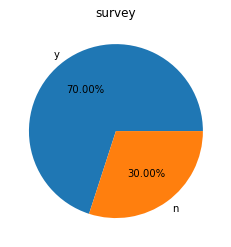

In [62]:
ans = ('y', 'n')
freq = [7, 3]
plt.pie(freq, labels = ans, autopct = '%1.2f%%') # 소수점 둘째 자리까지 표시
plt.title('survey')

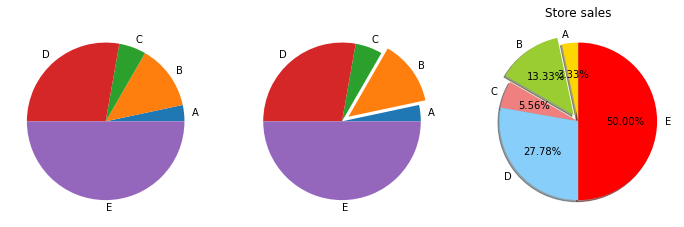

In [64]:
plt.rcParams['figure.figsize'] = [12,8] #subplot쓸 때, figsize 설정하는 법
store = ('A','B','C','D','E')
sales = [3, 12, 5, 25, 45]
y_pos = np.arange(len(store))

cols = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red']
explode = [0.0, 0.1, 0.0, 0.0, 0.0]

plt.subplot(1,3,1)
plt.pie(sales, labels=store)

plt.subplot(1,3,2)
plt.pie(sales, labels=store, explode = explode)

plt.subplot(1,3,3)
plt.pie(sales, labels=store, explode = explode, autopct='%1.2f%%', shadow=True, startangle =90, colors=cols)

plt.title('Store sales')
plt.show()


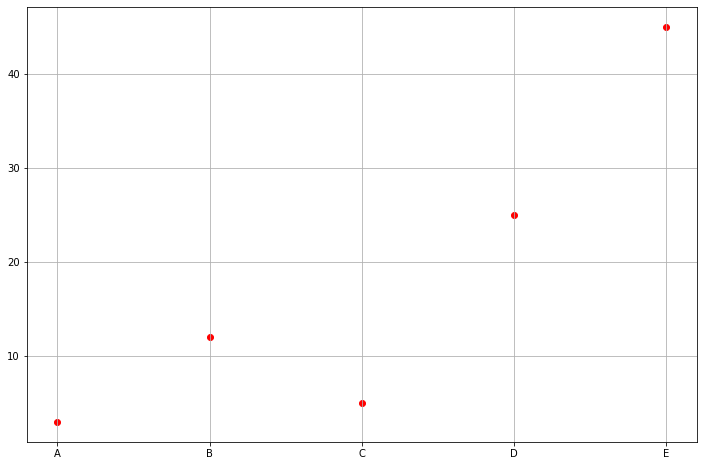

In [67]:
plt.grid()
plt.scatter(store, sales, color='r')


## 연속형 숫자형 데이터

* 줄기-잎 그림

(<Figure size 540x180 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x1a0792a04c0>)

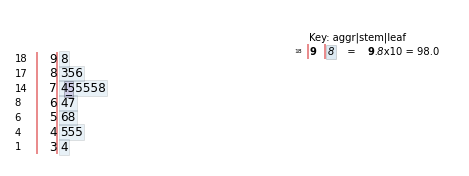

In [68]:
import sys
import stemgraphic

x = np.array([45,86,34,98,67,78,56,45,85,75,64,75,75,75,58,45,83,74])
stemgraphic.stem_graphic(x, scale=10)

* 상자그림

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

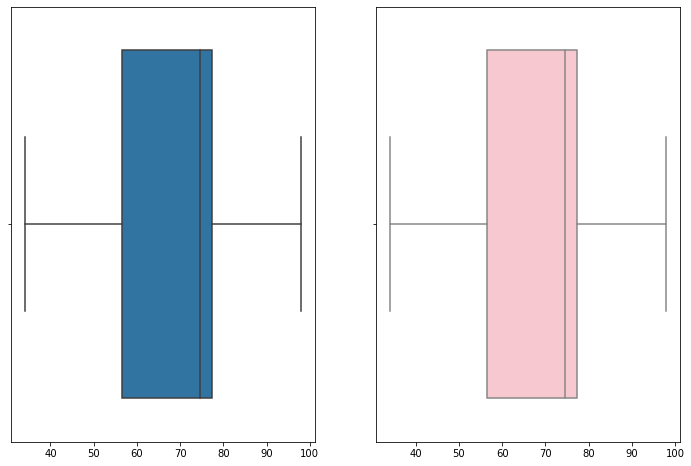

In [78]:
plt.subplot(1,2,1)
sns.boxplot(x, orient ='v')

plt.subplot(1,2,2)
sns.boxplot(x, color = 'pink')


(array([ 2.,  5.,  6., 11., 13.,  6.,  4.,  1.,  1.,  1.]),
 array([-1.59954797, -1.19311319, -0.78667841, -0.38024363,  0.02619115,
         0.43262593,  0.83906071,  1.24549549,  1.65193027,  2.05836505,
         2.46479983]),
 <BarContainer object of 10 artists>)

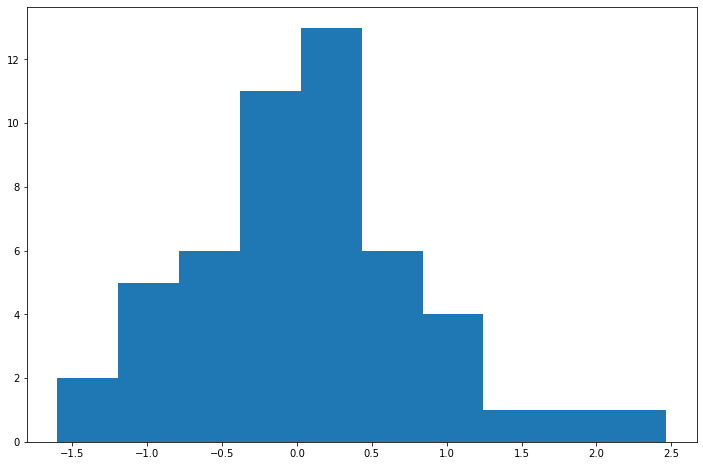

In [79]:
from scipy.stats import probplot
from scipy import stats
y= stats.norm.rvs(loc=0, scale=1, size=50)
plt.hist(y)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

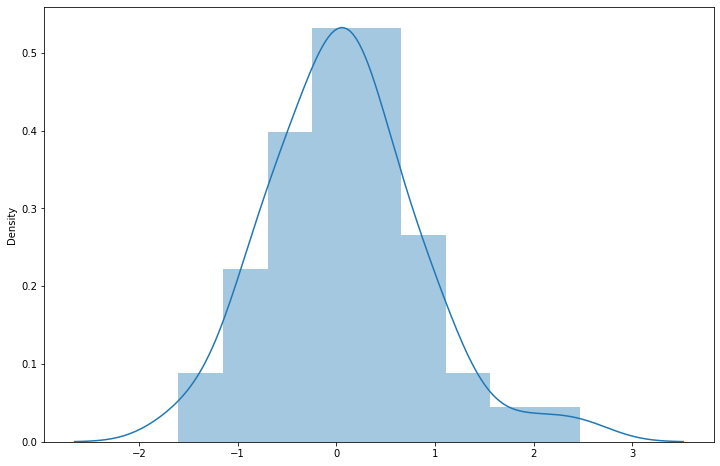

In [80]:
sns.distplot(y)

* 중심경향측도

* 평균 sp.mean()
* 표본분산 sp.var(object, ddof=1)
* 표본표준편차 sp.std(object, ddof=1)
* 백분위수 sp.percentile()
* 기술통계요약 sp.describe()

In [81]:
from scipy.stats import describe
describe(x) #nobs=갯수 skewness<0 : 왼쪽 꼬리 kurtosis : 첨도

DescribeResult(nobs=18, minmax=(34, 98), mean=67.66666666666667, variance=298.35294117647067, skewness=-0.3502161630770203, kurtosis=-0.737343763994069)

In [ ]:
# sp.amax(x)
# sp.amin(x)
# sp.percentile(x, [0.25, 0.7])

* 표준화 점수(Z= (x-mu)/s)

In [82]:
#데이터 y에 대해 표준화

y = [2,5,7,9,3]
z = (y-np.mean(y))/np.std(y, ddof=1)
print(z)
print(np.mean(z))
print(np.var(z, ddof=1))

[-1.11748847 -0.06984303  0.62858727  1.32701756 -0.76827333]
-4.4408920985006264e-17
0.9999999999999999


* 랜덤 데이터 y에 대해 95% 신뢰구간 구하기 X-bar +- z(a/2) * sigma / sqrt(n)

In [84]:
y = stats.norm.rvs(loc=0, scale=1, size=10)
n = len(y)
m = np.mean(y)
sd = np.std(y, ddof =1)
cri = stats.t.ppf(df = n-1, q = 0.975)

lower = m-cri*sd / np.sqrt(n)
upper = m+cri*sd / np.sqrt(n)
print(lower); print(upper)

-1.1927781664878372
0.6381716450871444


* 분산을 아는 경우 95% 신뢰구간 구하기

In [86]:
#데이터 y의 분산이 3이라고 알려져 있다면,

y = [2,5,7,9,3]
m = np.mean(y)
sigma2 = 3
sd = np.sqrt(sigma2)
cri = stats.norm.ppf(loc = 0, scale = 1, q = 0.975)
lower = m-cri*sd / np.sqrt(n)
upper = m+cri*sd / np.sqrt(n)
print(lower); print(upper)

4.126483513769706
6.273516486230294


각 데이터셋에 대한 평균과 근사적인 95% 신뢰구간을 구한 후 신뢰구간 그림 그리기

한 개의 확률표본은 표본정규분포를 따르는 랜덤데이터 10개로 구성
각 데이터셋의 평균과 근사 95% 신뢰구간을 구한 후 신뢰구간 그림을 그린다
위와 같은 작업을 30번 반복하여 30개 데이터셋에 대해 각각의 신뢰구간을 그린다

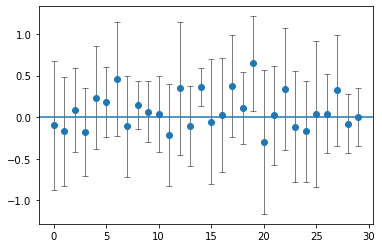

In [25]:
population = stats.norm(loc=0, scale=1)
time = np.array(np.arange(30))

def calc_sample(size, n_trial):
    sample_mean = np.zeros(n_trial)
    ci_lower = np.zeros(n_trial)
    ci_upper = np.zeros(n_trial)
    int_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = population.rvs(size=size)
        sample_mean[i] = np.mean(sample)
        sd = np.std(sample, ddof=1)/np.sqrt(size)
        ci_lower[i] = np.mean(sample) - 1.96 * sd
        ci_upper[i] = np.mean(sample) + 1.96 * sd
        int_array[i] = 1.96 * sd
    return (sample_mean, ci_lower, ci_upper, int_array)
    
np.random.seed(1)
m, lo, up, int_1 = calc_sample(size = 10, n_trial = 30)

plt.errorbar(
    time, #x
    m, #y
    yerr = int_1, #Y-errors /// 대칭 +-값이고, 신뢰구간 95%이기 때문에, 1.96*sd를 사용
    fmt = 'o', # format line like for plot()
    linewidth = 0.5,
    ecolor = 'k',
    capsize = 3,
    capthick = 0.5)

plt.axhline(y = 0)

결과 그림을 보면, 30개 중 2개의 신뢰구간에 참 평균모수값 0이 포함되지 않음을 알 수 있음

# 5장 연습문제

In [39]:
import numpy as np
import math as m
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy as sp
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pylab as py
import sys
!{sys.executable} -m pip install stemgraphic
import stemgraphic


In [33]:
df1 = pd.DataFrame({
    'experiment' : np.array(np.arange(1,21)),
    'count' : [10,12,20,14,17,20,14,13,11,17,21,11,16,14,17,2,0,1,7,2],
    'spray' : ['A','A','A','A','A','A','A','A','B','B','B','B','B','B','B','C','C','C','C','C'],
})

df1

,experiment,count,spray
0,1,10,A
1,2,12,A
2,3,20,A
3,4,14,A
4,5,17,A
5,6,20,A
6,7,14,A
7,8,13,A
8,9,11,B
9,10,17,B


In [35]:
pd.crosstab(index=df1['spray'], columns='빈도')

col_0,빈도
spray,
A,8
B,7
C,5


In [36]:
df1['count'].mean()

11.950

In [38]:
df1.groupby('spray')['count'].sum()

spray
A    120
B    107
C     12
Name: count, dtype: int64

In [40]:
#2

river = [735, 320, 325,392,524,450,1459,135,465,600,330,336,280,315,870,906,202,329,290,1000,600,505,1450,840,1243,890,350,407,286,280]

In [48]:
#a
print(np.mean(river))
print(np.median(river))

570.4666666666667
428.5


In [52]:
#b
print(np.var(river))
print(np.std(river))
print(np.percentile(river, 75) - np.percentile(river, 25))

125269.18222222221
353.93386701786847
492.5


In [53]:
#c
print(np.percentile(river, [15,45,80]))

[287.4  392.75 874.  ]


<AxesSubplot:ylabel='Count'>

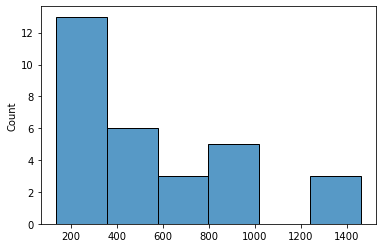

In [56]:
#d
sns.histplot(river)

{'whiskers': [<matplotlib.lines.Line2D at 0x1933935d310>,
 'caps': [<matplotlib.lines.Line2D at 0x1933935d910>,
 'boxes': [<matplotlib.lines.Line2D at 0x19339350fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1933935dfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1933936c370>],
 'means': []}

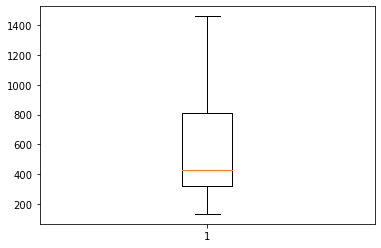

In [65]:
#e
plt.boxplot(river)

(<Figure size 540x162 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x19339144490>)

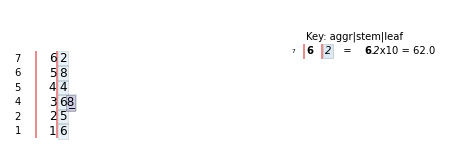

In [62]:
#3
bulb = [25,16,44,62,36,58,38]
stemgraphic.stem_graphic(bulb, scale=10)

In [66]:
#4
dataset = stats.uniform.rvs(loc=0, scale=1, size=30)

print(dataset.mean())
print(dataset.std())

0.4790544975503917
0.28441755221704895


In [69]:
mu = 0
std = 1

upper = dataset.mean()+2*dataset.std()/np.sqrt(30)
lower = dataset.mean()-2*dataset.std()/np.sqrt(30)

print(lower, upper)

0.37519989148393756 0.5829091036168458


1.7666666666666666
1.8
0.47222222222222215
0.6871842709362768
2.2
1.3778555633348892 2.155477769998444


(<Figure size 540x126 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x1933947e5e0>)

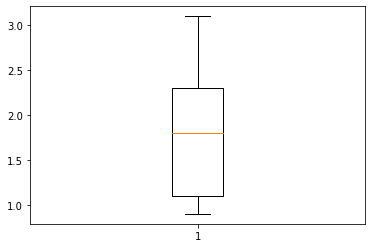

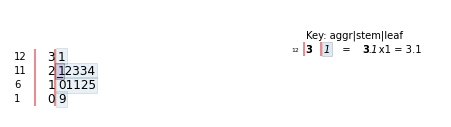

In [73]:
#6
impurities = [2.3,2.4,3.1,2.2,1.0,2.3,2.1,1.1,1.2,0.9,1.5,1.1]

#a
print(np.mean(impurities))
print(np.median(impurities))

#b
print(np.var(impurities))
print(np.std(impurities))
print(np.max(impurities) - np.min(impurities))

#c 평균 mu에 대한 95% 신뢰구간을 구하시오.
upper = np.mean(impurities) + 1.96*np.std(impurities)/np.sqrt(len(impurities))
lower = np.mean(impurities) - 1.96*np.std(impurities)/np.sqrt(len(impurities))
print(lower, upper)
#정확한 값을 위해서는 cri=sp.stats.norm.ppf(loc=0,scale=1,q=0.975)를 써야함

#d 상자그림
plt.boxplot(impurities)

#e 줄기-잎 그림
stemgraphic.stem_graphic(impurities, scale=1)

In [89]:
eye = pd.DataFrame({
    '주름있음' : {
        '흡연' : 60,
        '비흡연' : 30,
    },
    '주름없음' : {
        '흡연' : 10,
        '비흡연' : 40,
    }
})
eye

,주름있음,주름없음
흡연,60,10
비흡연,30,40


In [90]:
#a
eye.loc['흡연']['주름있음'] / eye.loc['흡연'].sum() * 100

85.71428571428571

Text(0.5, 1.0, 'nonsmoke')

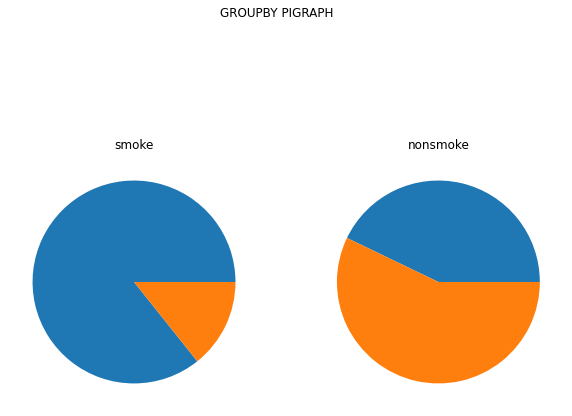

In [91]:
#d

df_smoke = eye.loc['흡연']
df_nonsmoke = eye.loc['비흡연']


plt.figure(figsize=(10, 8))
plt.suptitle('GROUPBY PIGRAPH')
plt.subplot(121)
plt.pie(df_smoke)
plt.title('smoke')
plt.subplot(122)
plt.pie(df_nonsmoke)
plt.title('nonsmoke')

8.680000000000001
7.892720334559037 9.467279665440966
3.2269473684210523
1.7963706099858827
6.3999999999999995


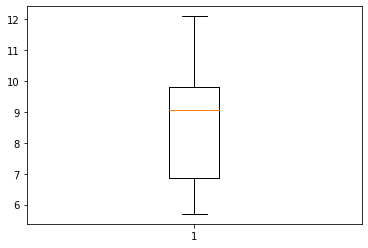

<AxesSubplot:ylabel='Count'>

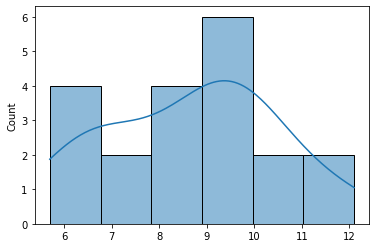

In [95]:
lifespan = [5.7,6.7,6.8,7.9,10.6,11.3,9.8,8.4,8.3,9.5,6.7,6.9,9.8,8.8,12.1,10.2,9.5,9.4,9.3,5.9]

#a
print(np.mean(lifespan))

#b
cri = stats.norm.ppf(loc=0, scale=1, q=0.975)
mu = np.mean(lifespan)
sd = np.std(lifespan, ddof=1)
n = len(lifespan)

upper = mu + cri*sd/np.sqrt(n)
lower = mu - cri*sd/np.sqrt(n)
print(lower, upper)

#c
print(np.var(lifespan, ddof=1))
print(np.std(lifespan, ddof=1))
print(np.max(lifespan)-np.min(lifespan))

#d
plt.boxplot(lifespan)
plt.show()

#e
sns.histplot(lifespan ,kde=True)

# 6장 이변량 데이터

In [96]:
belt = pd.DataFrame({
    'parent' : ['yes', 'no', 'yes', 'no'],
    'child' : ['yes', 'yes', 'no', 'no'],
    'y' : [54,3,7,12]
})
belt

,parent,child,y
0,yes,yes,54
1,no,yes,3
2,yes,no,7
3,no,no,12


In [103]:
cross = pd.pivot_table(
    data = belt,
    values = 'y',
    index = 'parent',
    columns = 'child',
    aggfunc = 'sum',
    margins = True # 합계 값
)

In [104]:
cross

child,no,yes,All
parent,,,
no,12,3,15
yes,7,54,61
All,19,57,76


In [108]:
# 부모와 아이의 안전벨트 착용 여부에 대해 서로 독립인지에 대한 통계적 검정으로 카이제곱검정 실시

obs = np.array([[12,3], [7,54]])
sp.stats.chi2_contingency(cross, correction = False)

(30.150819672131146,
 4.560314027990396e-06,
 4,
 array([[ 3.75, 11.25, 15.  ],
        [15.25, 45.75, 61.  ],
        [19.  , 57.  , 76.  ]]))

In [109]:
#parent, child 결합분포

pd.pivot_table(belt, index=['parent', 'child'], values='y')

y
parent child    
no     no     12
       yes     3
yes    no      7
       yes    54

In [113]:
cross = pd.pivot_table(
    data = belt,
    values = 'y',
    index = 'parent',
    columns = 'child',
    aggfunc = 'sum',
    margins = False # 합계 값
)

<AxesSubplot:xlabel='parent'>

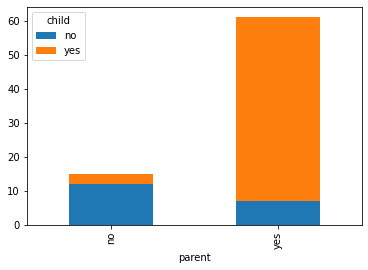

In [114]:
cross.plot(kind='bar', stacked=True)

* 빈도표 만들기

In [115]:
nico_df = pd.read_csv('data/table6.2_nicotin.csv')
nico_df

,patient,nicotin,stopsmoke
0,1,Y,Y
1,2,Y,Y
2,3,Y,N
3,4,Y,N
4,5,Y,Y
5,6,N,Y
6,7,N,N
7,8,N,N
8,9,N,N
9,10,N,N


In [116]:
nico_df.groupby(['nicotin', 'stopsmoke']).size()

nicotin  stopsmoke
N        N            4
         Y            1
Y        N            2
         Y            3
dtype: int64

In [117]:
nico_tab = pd.crosstab(index=nico_df['nicotin'], columns=nico_df['stopsmoke']) # 이원 분할표

In [118]:
nico_tab

stopsmoke,N,Y
nicotin,,
N,4,1
Y,2,3


### 두 개 연속형 변수에 대한 상관계수

이변량 데이터(X1, Y1), (X2, Y2)...(Xn, Yn)에 대한 상관성 고려
숫자형 변수 간의 상관관계이므로, 피어슨 상관계수로 추정함
-1 <= r <= 1

통계적 가설
H0 : p = 0 (두 변수 간의 상관계수가 0이다)
에 대해
Ha : p != 0(두 변수 간의 상관계수가 0이 아니다)

이때, 검정통계량 T는 귀무가설하에서 자유도가 n-2인 t분포를 따른다.
그러므로, |T| >= tn-2(alpha/2)이면, 귀무가설을 기각한다.
따라서, 가설검정결과 p-값이 유의수준보다 작으면 귀무가설을 기각한다.

* 모수적 방법(Parametic method): 모수를 특정 분포로 가정하여 접근하는 방법

* 비모수적 방법(Non-parametic method): 모집단의 특정 분포를 가정하지 않고 접근하는 방법이다. 비모수적 방법은 정규성 검정에서 정규분포를 따르지 않거나 표본의 개수가 10개 미만일 때 사용한다. 

상관계수도 똑같이 적용하면 된다. 즉, 정규분포 조건에 충족하지 못하면 비모수적 상관계수로 풀면 된다.

 

모수적 상관계수에는 가장 많이 알고 있는 피어슨 상관계수를 사용한다.

비모수적 상관계수로는 스피어만 상관계수, 켄달 검정이 있다.

스피어만 상관계수는 값에 순위를 매겨 그 순위에 대해 상관계수를 구한다. 이런 특성 때문에 데이터가 연속형 변수가 아닌 순 서형인 경우에도 상관계수를 구할 수 있다.
예를 들어, 수학 점수와 영어 점수와의 상관계수는 피어슨 상관계수로 계산할 수 있고, 수학 과목의 석차와 영어과목의 석차는 스피어만 상관계수로 계산할 수 있다.

켄달 타우

켄달 타우는 두 변수들 간의 순위를 비교하여 연관성을 계산한다.
p
=
C
−
D
C
+
D

* C: concordant pair의 수
* D: concordant pair가 아닌 수

켄달 타우를 계산하기 위해서는 concordant pair를 이해해야 하는데, 각 변수의 비교 대상의 상하 관계가 같으면 concordant pair라고 말한다.
예를 들어, 사람들의 키와 몸무게에 대한 상관계수를 알고 싶다고 하자.
1번째 케이스의 경우 A가 키가 크고, A가 몸무게도 더 나간다. 이런 경우 concordant pair라고 한다.
2번째 케이스의 경우 A가 키가 크지만, B의 몸무게가 더 나간다고 할 때 concordant pair가 아니라고 한다.
이는 예시를 통해 공부하면 더 쉽게 다가올 것이다. 예시는 여기서 공부하면 이해가 쉬울 것이다.


켄달 타우는 샘플 사이즈가 작거나 데이터의 동률이 많을 때 유용하다.
  

- point biserial correlation coefficient(점이연 상관계수)

한 변수가 명목형 변수이고, 다른 변수가 연속형일 때 사용한다.

### sp.stats.pearsonr(x,y) 피어슨 상관계수
### sp.stats.spearmanr(x,y) 스피어만 상관계수
### sp.stats.kendalltau(x,y) 켄달의 타우 통계량

### r, p = sp.stats.pearsonr(x,y) 피어슨, r = 검정통계량, p = p-값
### r, p = sp.stats.spearmanr(x,y) 스피어만, , r = 검정통계량, p = p-값
### r, p = sp.stats.kendalltau(x,y) 켄달의 타우 , r = 검정통계량, p = p-값

In [119]:
blood_df = pd.read_csv('data/table6.3_blood.csv')
blood_df

,id,machine,expert
0,1,68,72
1,2,82,84
2,3,94,89
3,4,106,100
4,5,92,97
5,6,80,88
6,7,76,84
7,8,74,70
8,9,110,103
9,10,93,84


In [120]:
#기계 측정평균과 간호사 측정 평균에 대한 상관관계 분석

sp.stats.pearsonr(blood_df['machine'], blood_df['expert'])

(0.9068599339014068, 3.1223022908831324e-06)

In [121]:
#기계와 간호사 간의 상관계수 0.90으로 매우 높고, p-값이 <0.05이므로 유의수준 5%에서 H0를 기각한다.

* 두 변수 간 Pearson 상관성과 Spearman 상관성을 구하고 상관성에 대한 유의성검정

In [122]:
x = blood_df['machine']
y = blood_df['expert']

r1, p1 = sp.stats.pearsonr(x, y)
print('pearson corr = ', r1)
print('pearson corr test p-value = ', p1)

r2, p2 = sp.stats.spearmanr(x, y)
print('spearman corr = ', r2)
print('spearman corr test p-value = ', p2)

r3, p3 = sp.stats.kendalltau(x, y)
print('kendalltau corr = ', r3)
print('kendalltau corr test p-value = ', p3)

pearson corr =  0.9068599339014068
pearson corr test p-value =  3.1223022908831324e-06
spearman corr =  0.8878955905305865
spearman corr test p-value =  9.935153559653397e-06
kendalltau corr =  0.7476080509788443
kendalltau corr test p-value =  0.00012693069801201953


Text(0, 0.5, 'expert')

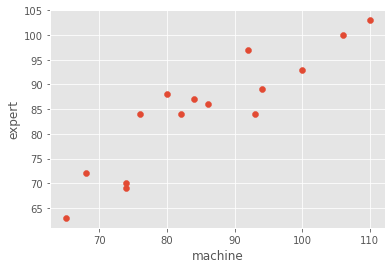

In [126]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.style.use('ggplot')
plt.scatter(x, y)
plt.xlabel('machine')
plt.ylabel('expert')

<AxesSubplot:>

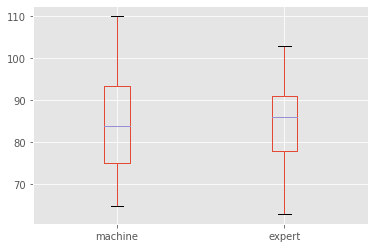

In [127]:
df = pd.DataFrame(data=blood_df, columns=['machine', 'expert'])
df.boxplot()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


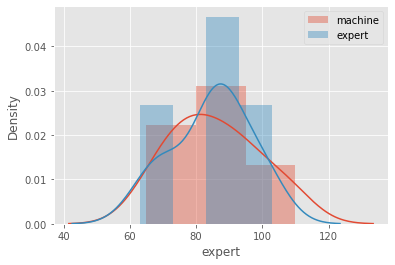

In [128]:
sns.distplot(blood_df['machine'], label = 'machine')
sns.distplot(blood_df['expert'], label = 'expert')
plt.legend()

# 6장 연습문제

In [175]:
#1

df = pd.read_csv('data/table6.5_fracture.csv')
df

,gender,fracture,age,blood
0,1,1,42,35
1,1,1,42,43
2,1,1,38,35
3,1,1,35,33
4,1,1,25,31
5,1,1,46,36
6,1,2,37,27
7,1,2,45,28
8,1,2,17,30
9,1,2,24,31


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   gender    22 non-null     int64
 1   fracture  22 non-null     int64
 2   age       22 non-null     int64
 3   blood     22 non-null     int64
dtypes: int64(4)
memory usage: 832.0 bytes


In [131]:
#a 환자 성별과 골절 종류의 빈도표
df_a = pd.crosstab(index=df['gender'], columns=df['fracture'])
df_a

fracture,1,2,3
gender,,,
1,6,4,0
2,0,7,5


In [132]:
#b 환자 성별로 blood의 평균을 구하시오
df_b = df.groupby('gender')['blood'].mean()
df_b

gender
1    32.900000
2    38.833333
Name: blood, dtype: float64

In [134]:
#c 환골절 종류별로 blood의 평균을 구하시오
df_c = df.groupby('fracture')['blood'].mean()
df_c

fracture
1    35.500000
2    32.545455
3    44.800000
Name: blood, dtype: float64

In [136]:
#d age와 blood 간 피어슨 상관계수를 구하시오
#e age와 blood 간 스피어만 상관계수를 구하시오

d = sp.stats.pearsonr(df['age'],df['blood'])
e = sp.stats.spearmanr(df['age'],df['blood'])

print(d, e)

(-0.04325692537768133, 0.8484170053641263) SpearmanrResult(correlation=-0.049645392068624034, pvalue=0.8263385055503778)


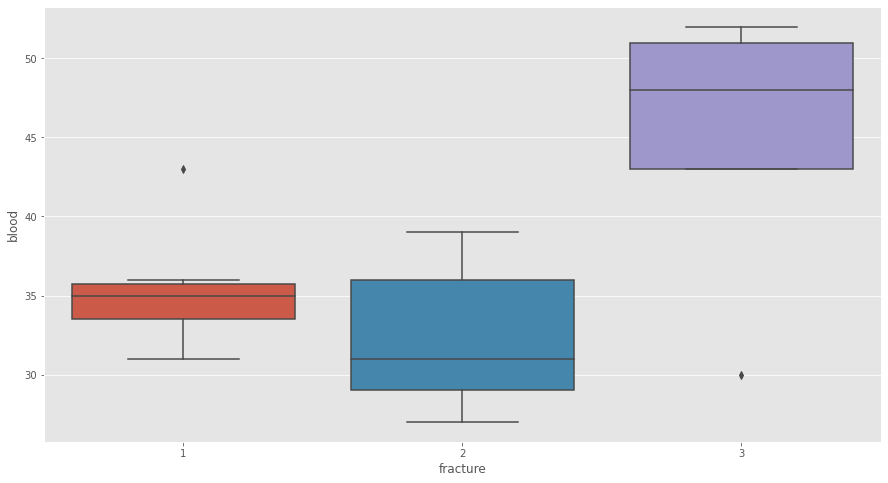

In [163]:
#f 한 개의 그래프 평면 안에 골절 종류별로 혈액임파구수의 상자그림을 그리시오

plt.figure(figsize=(15, 8))
sns.boxplot(x='fracture', y='blood', data=df)
plt.show()

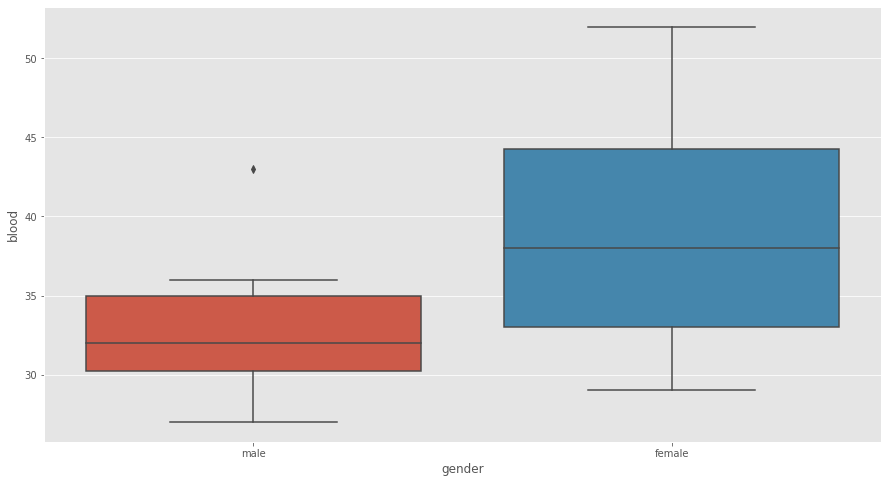

In [180]:
#g 한 개의 그래프 평면 안에 성별로 혈액임파구수의 상자그림을 그리시오

df['gender'] = df['gender'].replace([1, 2],['male','female'])
df


plt.figure(figsize = (15,8))
sns.boxplot(data=df, x='gender', y='blood')
plt.show()

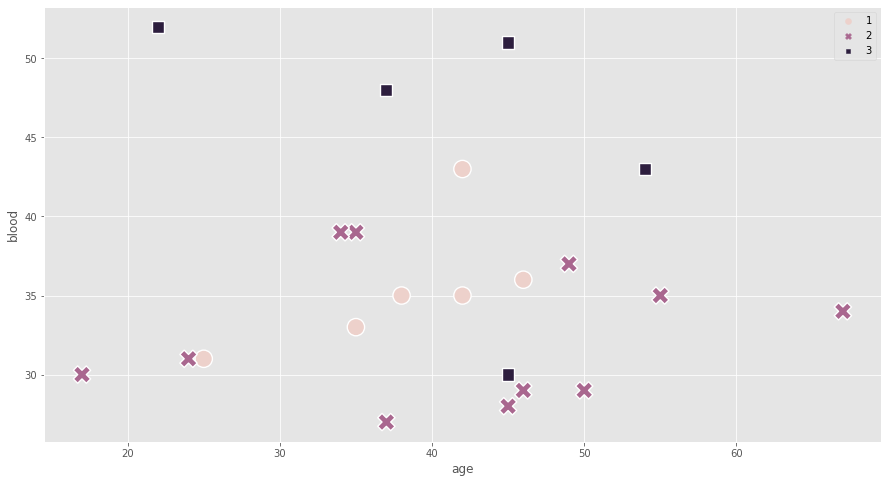

In [198]:
plt.figure(figsize = (15,8))
sns.scatterplot(data=df, x='age', y='blood', hue='fracture', s=300, style='fracture')
plt.legend()

In [211]:
#2
df = pd.read_csv('data/table6.6_president_election.csv')
df

,ism,candidate,freq
0,progress,M,426
1,middle,M,543
2,conservative,M,130
3,progress,H,59
4,middle,H,373
5,conservative,H,625
6,progress,A,215
7,middle,A,674
8,conservative,A,245


In [222]:
#a

a = pd.crosstab(index=df['ism'], columns=df['candidate'], values=df['freq'], aggfunc='sum')
a

candidate,A,H,M
ism,,,
conservative,245,625,130
middle,674,373,543
progress,215,59,426


In [209]:
#b
df['rate'] = df['freq']/np.sum(df['freq'])
df


c = pd.crosstab(index=df['ism'], columns=df['candidate'], values=df['rate'], aggfunc='sum', margins=True)
c

candidate,A,H,M,All
ism,,,,
conservative,0.074468,0.189970,0.039514,0.303951
middle,0.204863,0.113374,0.165046,0.483283
progress,0.065350,0.017933,0.129483,0.212766
All,0.344681,0.321277,0.334043,1.000000


In [221]:
df1 = df.groupby('candidate')
df1

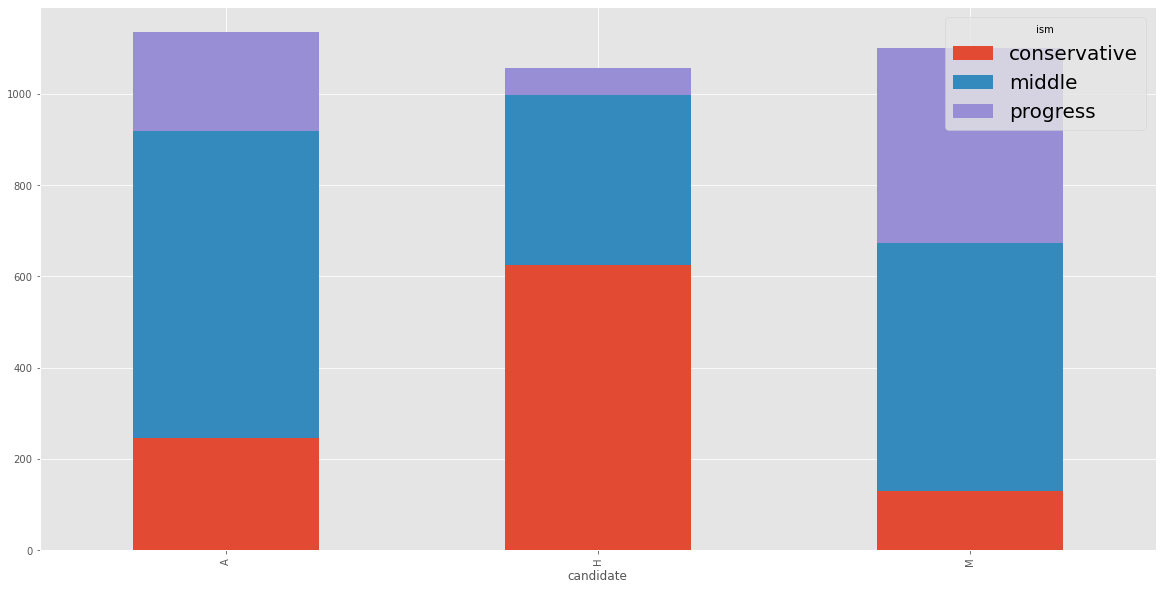

In [236]:
#d

d = pd.crosstab(index=df['candidate'], columns=df['ism'], values=df['freq'], aggfunc='sum')

plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["legend.fontsize"] = (20)

d.plot(kind='bar', stacked=True)
plt.show()

In [237]:
#4
event=pd.read_csv("data/problem8.3_hangsa.csv")
event

,grade,present,freq
0,1,yes,40
1,2,yes,30
2,3,yes,35
3,4,yes,20
4,1,no,20
5,2,no,30
6,3,no,45
7,4,no,40


In [241]:
#a 학년 별 참석과 불참 비율, 학년별 막대 그래프

event['rate'] = event['freq']/event['freq'].sum()

a1 = pd.crosstab(index=event['grade'], columns=event['present'], values=event['rate'], aggfunc='sum')
a1

present,no,yes
grade,,
1,0.076923,0.153846
2,0.115385,0.115385
3,0.173077,0.134615
4,0.153846,0.076923


<AxesSubplot:xlabel='grade'>

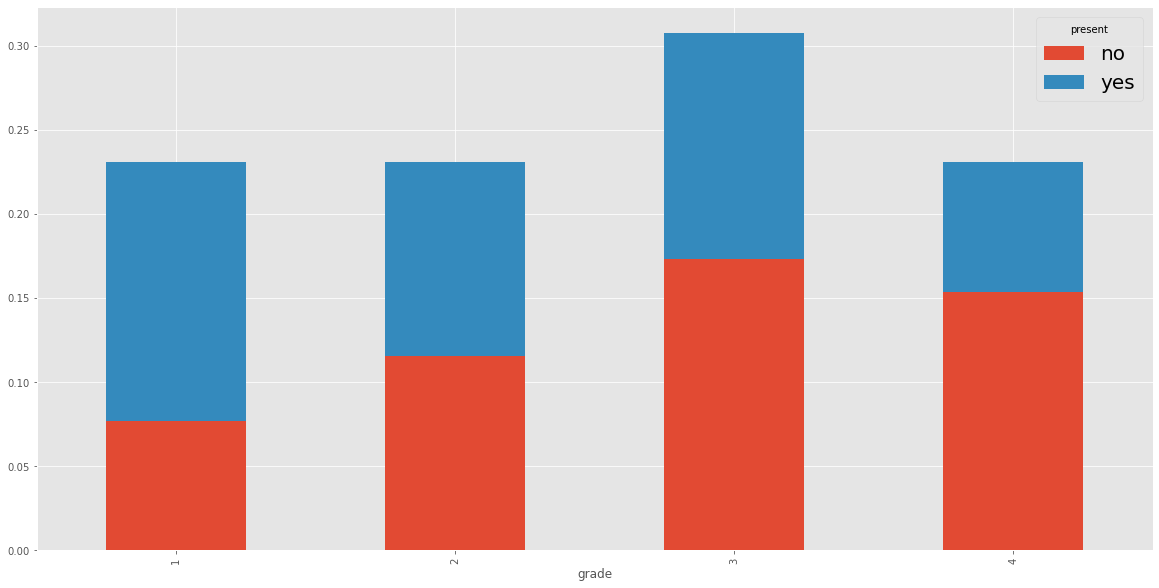

In [243]:
#a-2

a1.plot(kind='bar', stacked=True)

In [247]:
#b 전체 데이터에 대해

event['rate'] = event['freq']/event['freq'].sum()

b = pd.crosstab(columns=event['grade'], index=event['present'], values=event['rate'], aggfunc='sum')
b

grade,1,2,3,4
present,,,,
no,0.076923,0.115385,0.173077,0.153846
yes,0.153846,0.115385,0.134615,0.076923


<AxesSubplot:xlabel='present'>

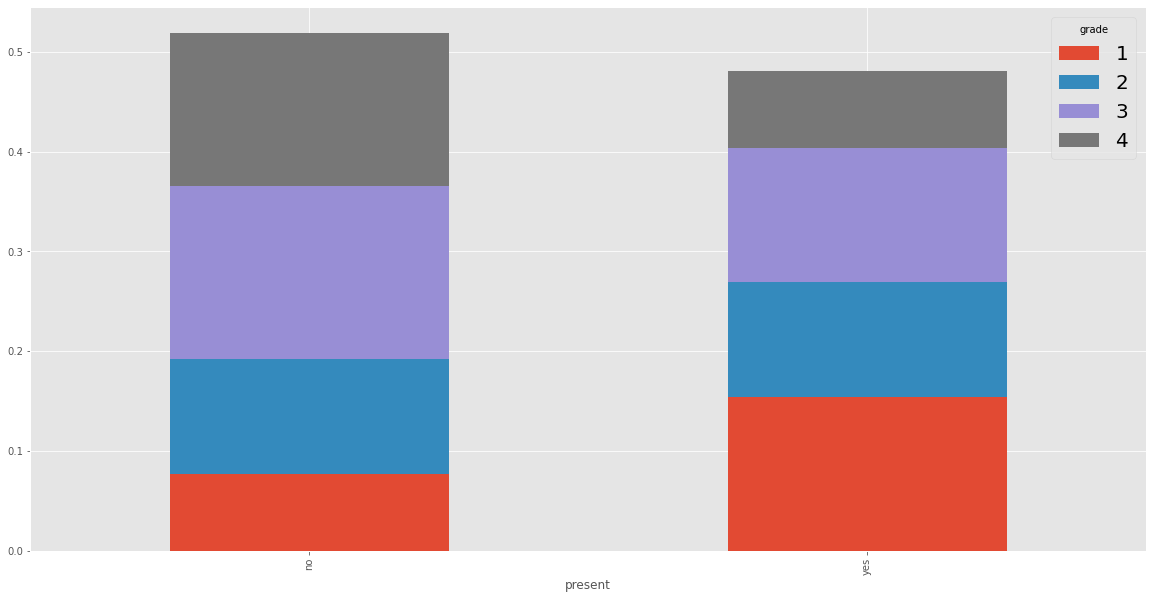

In [248]:
b.plot(kind='bar',stacked=True)

In [249]:
#6

df = pd.read_csv('data/table6.7_diabetes.csv')
df


,patient,Y1,Y2,X1,X2,X3
0,1,0.81,80,356,124,55
1,2,0.95,97,289,117,76
2,3,0.94,105,319,143,105
3,4,1.04,90,356,199,108
4,5,1.00,90,323,240,143
5,6,0.76,86,381,157,165
6,7,0.91,100,350,221,119
7,8,1.10,85,301,186,105
8,9,0.99,97,379,142,98
9,10,0.78,97,296,131,94


In [254]:
#a
sp.stats.pearsonr(df['Y1'], df['Y2'])
#상관관계 없음

(0.08313885094013168, 0.7060705083092707)

In [253]:
#b
sp.stats.pearsonr(df['X1'],df['Y2'])
#상관관계 없음

(0.014526438427961502, 0.947549396822225)

In [255]:
#c
# p-value가 0.05보다 크므로, H0를 기각하지 못한다

([<matplotlib.patches.Wedge at 0x1933ca08520>,
 [Text(-0.3683674890029374, 1.0364870443211873, 'more than 90'),
  Text(0.3683673919600155, -1.036487078810236, 'less than 90')])

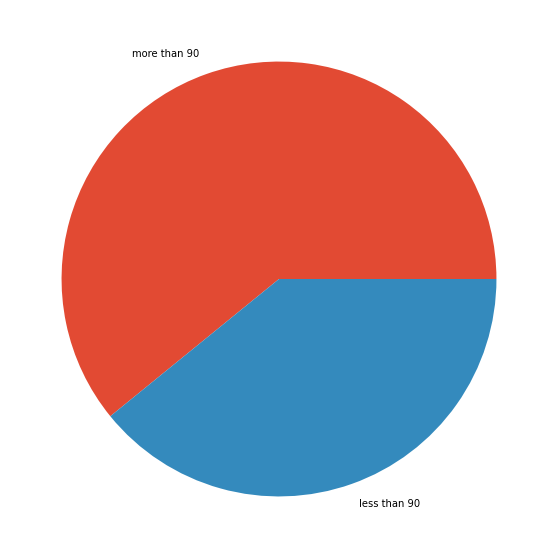

In [264]:
#d

a = df[df['Y2'] >=90]
b = df[df['Y2'] <90]
labels = ['more than 90', 'less than 90']
freq=[len(a), len(b)]

plt.pie(freq, labels=labels)

<AxesSubplot:xlabel='Y1', ylabel='Y2'>

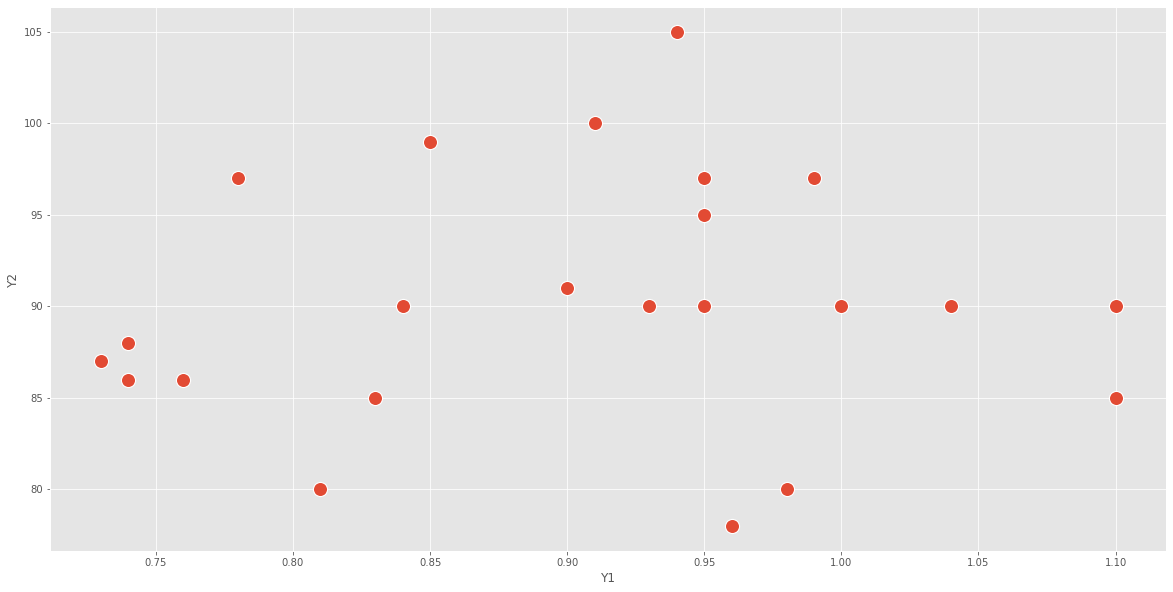

In [267]:
sns.scatterplot(data=df, x='Y1', y='Y2', s=200)

<AxesSubplot:xlabel='X1', ylabel='Y2'>

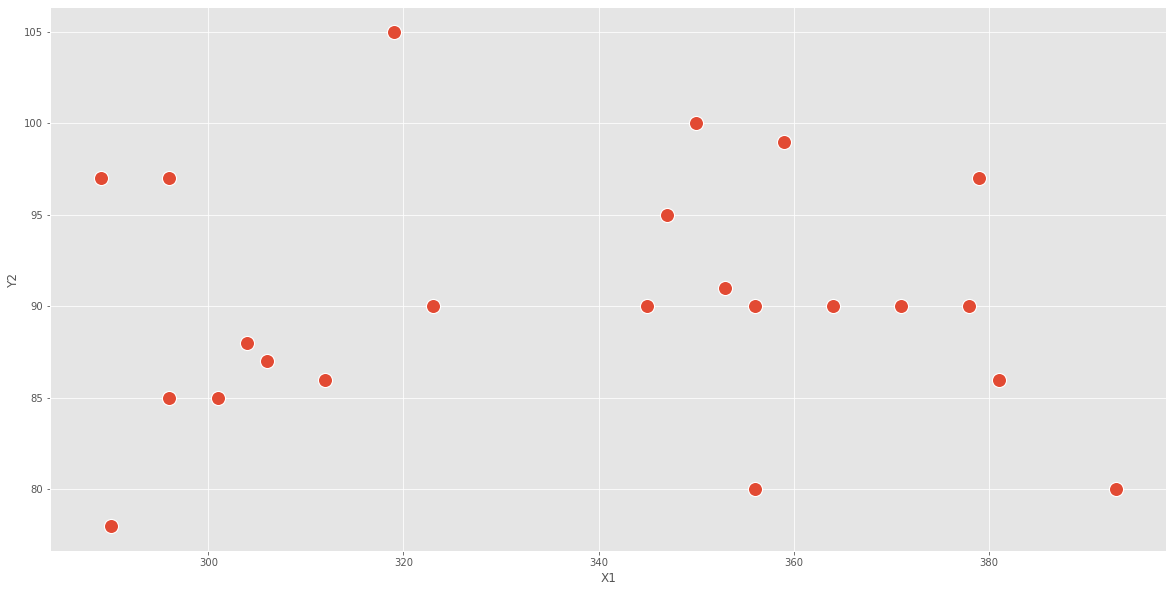

In [268]:
sns.scatterplot(data=df, x='X1', y='Y2', s=200)

# 7장 유의성 검정

# 일집단 t-검정

일변량 확률표본이 서로 독립이며 평균, 분산이 N(mu, sigma^2)을 따를 때, 확률표본에 대하여 특정한 모평균에 대한 가설검정을 위한 검정통계량 t= X-bar - mu / S / sqrt(n)이다

# 소표본(n<30)이며, 모분산을 모르는 경우

## stats.ttest()
## stats.ttest_1samp(표본, 평균) : 일집단 양측 t검정
## stats.t.interval(alpha=0.95, df=n-1, loc=mean, scale=표준편차)

1) 한 집단 평균 검정
- 하나의 데이터 집단의 평균과 비교하고자 하는 관측치를 통해 차이를 검정하는 방법이다.
- 데이터 집단의 평균과 거리가 멀 수록 p-value 유의수준의 값이 떨어진다.
- stats.ttest_1samp() 이용

* 원숭이 몸무게가 정규분포를 따른다.
* 원숭이의 평균 몸무게가 8.5kg이라고 할 수 있는지 검정

In [6]:
monkey = [8.30, 9.50, 9.60, 8.75, 8.40, 9.10, 8.15, 8.80]
print(np.mean(monkey))
stats.ttest_1samp(monkey, 8.5)

8.825000000000001


Ttest_1sampResult(statistic=1.6986364689534246, pvalue=0.13319262723588568)

In [8]:
mean_monkey = np.mean(monkey)
n = len(monkey)
s = sp.sqrt(sp.var(monkey, ddof=1)/n)
stats.t.interval(alpha=0.95, df=n-1, loc=mean_monkey, scale=s)

<ipython-input-8-aa76937fc4d2>:3: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  s = sp.sqrt(sp.var(monkey, ddof=1)/n)
<ipython-input-8-aa76937fc4d2>:3: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  s = sp.sqrt(sp.var(monkey, ddof=1)/n)


(8.372576602984484, 9.277423397015518)

검정통계량 t = 1.699, p-value = 0.1332 > 0.05 이므로 H0를 기각하지 못한다  \
유의수준 5%하에서 원숭이의 평균 몸무게가 8.5kg이 아니라고 할 수 있는 통계적 근거가 없다.  \
모평균 추정값은 8.825이며, 모평균에 대한 95% 신뢰구간은 (8.3725, 9.2774)이다

* 원숭이의 평균 몸무게가 8.5kg 이하라고 할 수 있는지 검정

In [9]:
# H0 : mu <= 8.5에 대해 H1 : mu > 8.5
stats.ttest_1samp(monkey, 8.5)

Ttest_1sampResult(statistic=1.6986364689534246, pvalue=0.13319262723588568)

t = 1.699, p-value = 0.1332 / 2 = 0.0666 > 0.05이므로, H0를 기각하지 못한다.  \
유의수준 5%에서 원숭이 평균 몸무게가 8.5kg보다 크다고 할 수 있는 통계적 근거가 없다.

In [11]:
???????????????????????????????????????????????????????????????????????
왜 H0를 mu <= 8.5라고 두는건가?

Object `?????????????????????????????????????????????????????????????????????` not found.
Object `두는건가` not found.


* 원숭이의 평균 몸무게가 8.5kg 이상이라고 할 수 있는지 검정

In [14]:
#H0 : mu >= 8.5에 대해 H1 : mu < 8.5


t = 1.699, p-value = 1 - (0.1332 / 2) = 0.9334 > 0.05이므로, H0를 기각하지 못한다.  \
유의수준 5%에서 원숭이 평균 몸무게가 8.5kg보다 작다고 할 수 있는 통계적 근거가 없다.

# 모분산을 아는 경우 Z사용!
* Z = x-bar - mu / sigma / sqrt(n)

### 원숭이 몸무게는 분산이 1인 정규분포, 평균 몸무게가 8.5kg이라고 할 수 있는지

In [17]:
mon = [8.30, 9.50, 9.60, 8.75, 8.40, 9.10, 8.15, 8.80]

mean_mon = np.mean(mon)
z = (mean_mon-8.5) / (1/np.sqrt(n))
print(z)

p = stats.norm.cdf(loc=0, scale=1, x=z)
p_value = (1-p)*2 # 양측이므로
print(p_value)

0.9192388155425149
0.3579706726443266


검정통계량 z=0.919, p-value=0.3579 > 0.05이므로 H0를 기각하지 못한다.  \
유의수준 5%에서 원숭이의 평균 몸무게가 8.5kg이 아니라고 할 수 있는 통계적 근거가 없다

# 이집단 t-검정
### 일변량 표본으로 소표본(n<30)에서 모분산 sigma1^2=sigma2^2=sigma3^2이며, sigma^을 모르는 경우

### stats.ttest_ind(x,y, equal_var=True or False)
### stats.t.interval(alpha=0.95, df=df, loc=mean, scale=s)

2) 두 집단 평균 검정
 - 두 데이터 집단간의 비교
 - stats.ttest_ind(x,y) 이용


In [18]:
# 지혈제 A와 B의 효과를 측정한 데이터

a = np.array([1.1,2.3,4.3,2.2,5.3])
b = np.array([2.3,4.3,3.5])

stats.ttest_ind(a,b, equal_var=True)

Ttest_indResult(statistic=-0.29560296705282707, pvalue=0.7774965102669648)

In [20]:
# 두 집단의 분산이 같다고 가정할 경우
mean_a = np.mean(a)
mean_b = np.mean(b)

s2_a = np.var(a, ddof=1)
s2_b = np.var(b, ddof=1)

na = len(a)
nb = len(b)

df2 = (na+nb-2)

s2_pool = ((na-1)*s2_a + nb-1*s2_b) / df2
se_pool = np.sqrt(s2_pool*(1/na+1/nb))

stats.t.interval(alpha=0.95, df=df2, loc=mean_a-mean_b, scale=se_pool)

(-3.0267751400719662, 2.373441806738633)

검정통계량 t = -0.295, p-값 = 0.7775 > 0.005이므로, H0를 기각하지 못한다.  \
유의수준 5%에서 지혈제 A와 B의 효과가 차이가 난다고 할 수 있는 통계적 근거가 없다.  \
모평균의 차 mua - mub에 대한 95%의 신뢰구간은 (-3.03, 2.37)이다

In [22]:
# 두 집단의 분산이 다르다고 가정할 경우
result = stats.ttest_ind(a,b, equal_var=False)
print(result)
s= np.sqrt(s2_a/na + s2_b/nb)
stats.t.interval(alpha=0.95, df=df2, loc=mean_a-mean_b, scale=s)

Ttest_indResult(statistic=-0.3399500518250425, pvalue=0.7455323834085559)


(-2.6779666090573992, 2.024633275724066)

검정통계량 t = -0.339, p-값 = 0.7455 > 0.005이므로, H0를 기각하지 못한다.  \
유의수준 5%에서 지혈제 A와 B의 효과가 차이가 난다고 할 수 있는 통계적 근거가 없다.  \
모평균의 차 mua - mub에 대한 95%의 신뢰구간은 (-2.677, 2.024)이다

* 배양법에 따른 호박잎의 질소 성분 함량의 차이

In [23]:
df = pd.read_csv('data/table7.4_method.csv')
df

,method,x
0,1,19.1
1,1,32.8
2,1,27.6
3,1,25.9
4,1,28.5
5,2,17.0
6,2,16.4
7,2,16.8
8,2,15.3


In [24]:
# 그룹 별 기초 통계량
df.groupby('method')['x'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
1,5.0,26.780,4.990691,19.1,25.900,27.6,28.50,32.8
2,4.0,16.375,0.758837,15.3,16.125,16.6,16.85,17.0


In [26]:
x1 = df.loc[df['method']==1]['x']
x2 = df.loc[df['method']==2]['x']

In [27]:
stats.ttest_ind(x1, x2, equal_var=True)

Ttest_indResult(statistic=4.076253525765535, pvalue=0.004711895738553825)

t = 4.076, p-value = 0.0047 < 0.05d이므로, H0를 기각한다.  \
유의수준 5%에서 배양법1과 배양법2의 질소성분함량에 유의한 차이가 있다.

## 이집단 분산비 F-검정

In [28]:
# 지혈제 A와 B의 효과를 측정한 데이터

a = np.array([1.1,2.3,4.3,2.2,5.3])
b = np.array([2.3,4.3,3.5])

F = np.var(a, ddof=1)/np.var(b, ddof=1)
df1 = len(a) - 1
df2 = len(b) - 1
alpha = 0.05
p_value = 2*(1-sp.stats.f.cdf(F,df1,df2))
print(F, p_value,)


2.8894736842105258 0.5465404498283244


F = 2.8894, p-value = 0.5465 > 0.05이므로 H0를 기각하지 못한다.  \
유의수준 5%에서 지혈제 A와 지혈제 B의 분산은 같다고 할 수 있다.  \
모분산비 sigmaA^2/sigmaB^2의 추정값은 2.8895이다.  \
?????????????????????????????????????????????????????????????????????????

# 짝지어진 표본에 대한 t-검정

* 쌍으로 측정된 확률표본의 두 집단의 모평균이 같은지 검정하고자 한다.

In [29]:
df = pd.read_csv('data/table7.6_sugang.csv')
df

,id,pre,post
0,1,77,99
1,2,56,80
2,3,64,78
3,4,60,65
4,5,53,59
5,6,72,67
6,7,67,65
7,8,73,85
8,9,67,74
9,10,79,80


In [30]:
ddif = df['post']-df['pre']
stats.ttest_1samp(ddif, 0)

Ttest_1sampResult(statistic=2.7587566502019634, pvalue=0.022157168144524664)

t = 2.758, p-value=0.0221 < 0.05이므로 유의수준 5%에서 H0를 기각한다.  \
즉, 강좌 수강 전후 점수 차이가 유의하므로 강좌 효과가 유의하다

# 일집단 모비율에 대한 검정

* 한 집단이 어떤 사건에 대해 특정한 모비율 p를 갖는다고 할 수 있는지에 대한 검정을 하고자 한다

* Z^2은 근사적으로 카이제곱 분포를 따르기 때문에, Z^2 통계량을 이용하여 모비율에 대한 카이제곱검정을 시행한다

In [31]:
# A 살충제는 한 번 살포에 85%의 살충효과가 있다고 광고한다.
# 150마리 모기에게 살포했더니 110마리가 죽었다.
# A 살충제의 광고가 믿을만한지, 유의성 검정을 하고자 한다.

In [33]:
from statsmodels.stats.proportion import proportions_ztest
count = 110
nobs = 150
value = 0.85
prop = count/nobs

stat, pval = proportions_ztest(count, nobs, value)
print(prop)
print('z-stat = ',stat, 'p-value =', pval)

0.7333333333333333
z-stat =  -3.2311516382074847 p-value = 0.0012329251183447925


검정통계량 z = -3.231, p-value = 0.00123 < 0.05이므로 유의수준 5%에서 H0를 기각한다.  \
즉 살충제 A의 살충 효과가 85%가 아니라는 통계적 근거가 있다.  \
표본 비율은 0.733으로 모비율을 추정한다.

# 이집단 모비율에 대한 검정

In [35]:
# A도시와 B도시의 D후보 지지 비율이 같다고 할 수 있는지 통계적 검정 실시
# A도시에서는 300명 중 100명이, B도시에서는 400명 중 170명이 D후보를 지지한다고 조사됨

In [36]:
count = np.array([100, 170])
nobs = np.array([300, 400])
prop = count/nobs

stat, pval = proportions_ztest(count, nobs)
print(prop)
print('z-stat = ', stat, 'p-value = ', pval)

[0.333 0.425]
z-stat =  -2.4656701201792273 p-value =  0.013675721698622408


검정통계량 z = -2.4656, p-value = 0.0136 < 0.05이므로 유의수준 5%에서 H0를 기각한다.  \
즉, A와 B도시 간에 D 후보 지지율에 유의한 차이가 있다.

# 8장 카이제곱검정

In [38]:
# 이원분할표로 주어진 두 변수 간 독립성 검정

obs = np.array([[54,45], [63,65]])
obs

array([[54, 45],
       [63, 65]])

In [39]:
stats.chi2_contingency(obs)

(0.4388354133678475,
 0.5076850879394676,
 1,
 array([[51.026, 47.974],
        [65.974, 62.026]]))

카이제곱통계량 0.4388, p-value=0.5077 > 0.05이므로 유의수준 5%하에서 귀무가설을 기각하지 못한다.  \
따라서, 고등학교 졸업여부와 수입은 서로 독립이라고 할 수 있다.